In [1]:
! pip install librosa

In [2]:

import numpy as np
import pandas as pd

# Input data files are available in the read-only "/content/drive/MyDrive/archive" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(".\\Data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))



.\Data\set_a.csv
.\Data\set_a_timing.csv
.\Data\set_b.csv
.\Data\set_a\artifact__201012172012.wav
.\Data\set_a\artifact__201105040918.wav
.\Data\set_a\artifact__201105041959.wav
.\Data\set_a\artifact__201105051017.wav
.\Data\set_a\artifact__201105060108.wav
.\Data\set_a\artifact__201105061143.wav
.\Data\set_a\artifact__201105190800.wav
.\Data\set_a\artifact__201105280851.wav
.\Data\set_a\artifact__201106010559.wav
.\Data\set_a\artifact__201106010602.wav
.\Data\set_a\artifact__201106021541.wav
.\Data\set_a\artifact__201106030612.wav
.\Data\set_a\artifact__201106031558.wav
.\Data\set_a\artifact__201106040722.wav
.\Data\set_a\artifact__201106040933.wav
.\Data\set_a\artifact__201106040947.wav
.\Data\set_a\artifact__201106041452.wav
.\Data\set_a\artifact__201106050353.wav
.\Data\set_a\artifact__201106061233.wav
.\Data\set_a\artifact__201106070537.wav
.\Data\set_a\artifact__201106070949.wav
.\Data\set_a\artifact__201106101314.wav
.\Data\set_a\artifact__201106101955.wav
.\Data\set_a\artifact_

In [3]:
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa
import librosa.display
# heart itz
import IPython.display as ipd

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Load use wave
import wave

# Load use scipy
from scipy.io import wavfile

import warnings
warnings.filterwarnings('ignore')

### let's take a look some sample by category

In [4]:
# parent folder of sound files
INPUT_DIR= ".\\Data"

#### 1. Normal

In [5]:
normal_file=INPUT_DIR+"/set_a/normal__201106111136.wav"
ipd.Audio(normal_file)

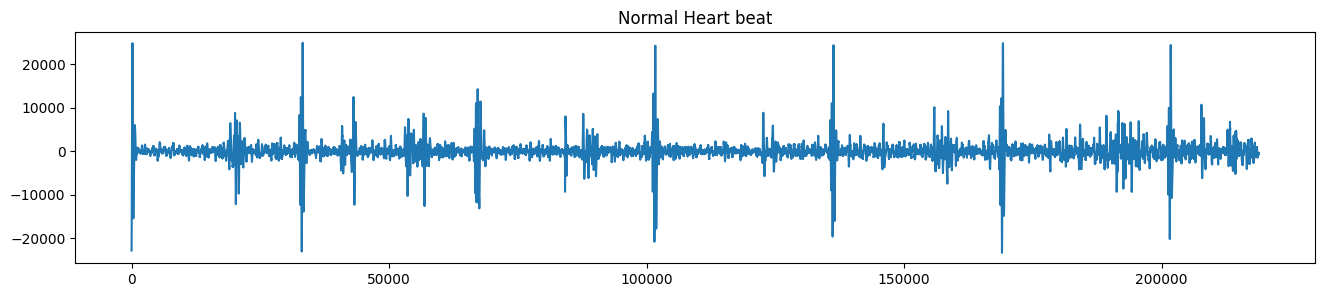

In [6]:
wav = wave.open(normal_file)
rate, data = wavfile.read(normal_file)

# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.title("Normal Heart beat")
plt.plot(data, '-', );

In [7]:
murmur_file=INPUT_DIR+"/set_b/murmur_noisymurmur_135_1306428972976_A.wav"
ipd.Audio(murmur_file)

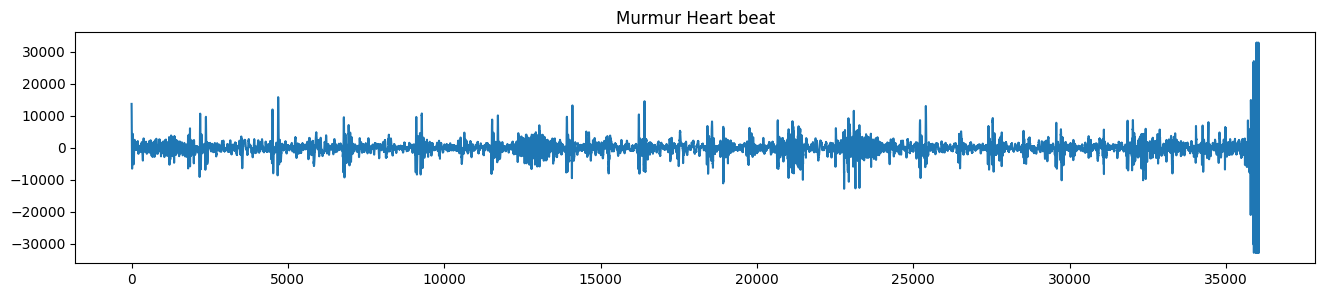

In [8]:
wav = wave.open(murmur_file)
rate, data = wavfile.read(murmur_file)

# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.title("Murmur Heart beat")
plt.plot(data, '-', );

In [9]:
extrastole_file=INPUT_DIR+"/set_b/extrastole__286_1311170606028_D.wav"
ipd.Audio(extrastole_file)

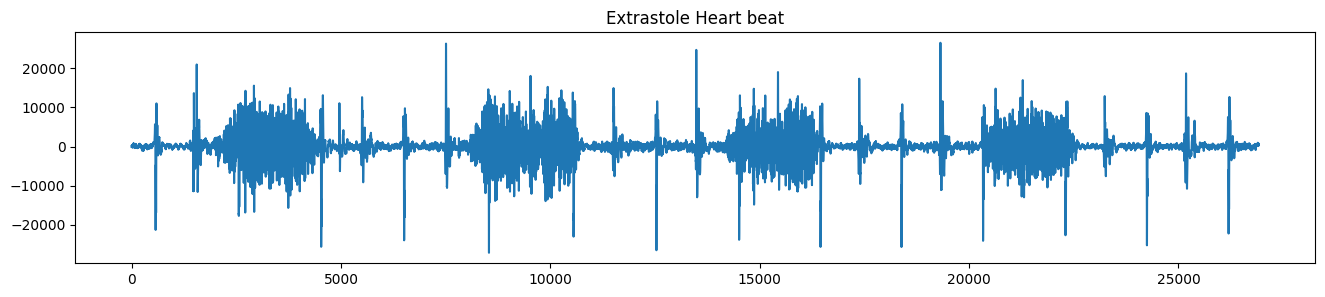

In [10]:
wav = wave.open(extrastole_file)
rate, data = wavfile.read(extrastole_file)

# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.title("Extrastole Heart beat")
plt.plot(data, '-', );

In [11]:
artifact_file=INPUT_DIR+"/set_a/artifact__201106110909.wav"
ipd.Audio(artifact_file)

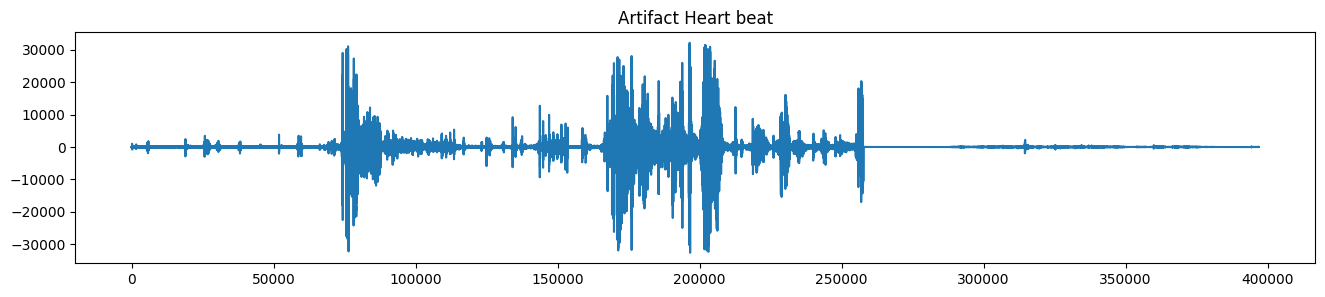

In [12]:
wav = wave.open(artifact_file)
rate, data = wavfile.read(artifact_file)

# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.title("Artifact Heart beat")
plt.plot(data, '-', );

In [13]:
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
ipd.Audio(extrahls_file)

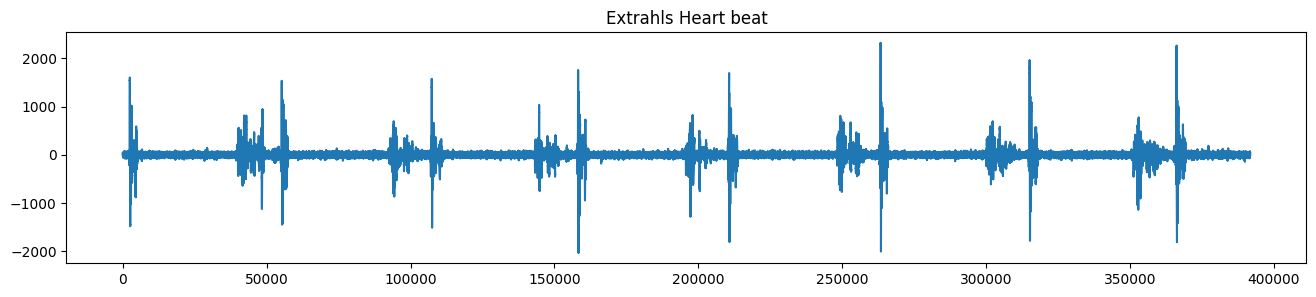

In [14]:
wav = wave.open(extrahls_file)
rate, data = wavfile.read(extrahls_file)

# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.title("Extrahls Heart beat")
plt.plot(data, '-', );

In [15]:
y, sr = librosa.load(normal_file)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Len of Audio:', (np.shape(y)[0])/sr)
y1, sr1 = librosa.load(murmur_file,duration=5)

y2, sr2 = librosa.load(extrastole_file, duration=5)

y3, sr3 = librosa.load(artifact_file, duration=5)

y4, sr4 = librosa.load(extrahls_file, duration=5)

y: [-0.5146696  -0.74414134 -0.6486094  ... -0.01393005 -0.01530627
 -0.00996399] 

y shape: (109452,) 

Sample Rate (KHz): 22050 

Len of Audio: 4.963809523809524


In [16]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))
audio_file1, _ = librosa.effects.trim(y1)
audio_file2, _ = librosa.effects.trim(y2)
audio_file3, _ = librosa.effects.trim(y3)
audio_file4, _ = librosa.effects.trim(y4)

Audio File: [-0.5146696  -0.74414134 -0.6486094  ... -0.01393005 -0.01530627
 -0.00996399] 

Audio File shape: (109452,)


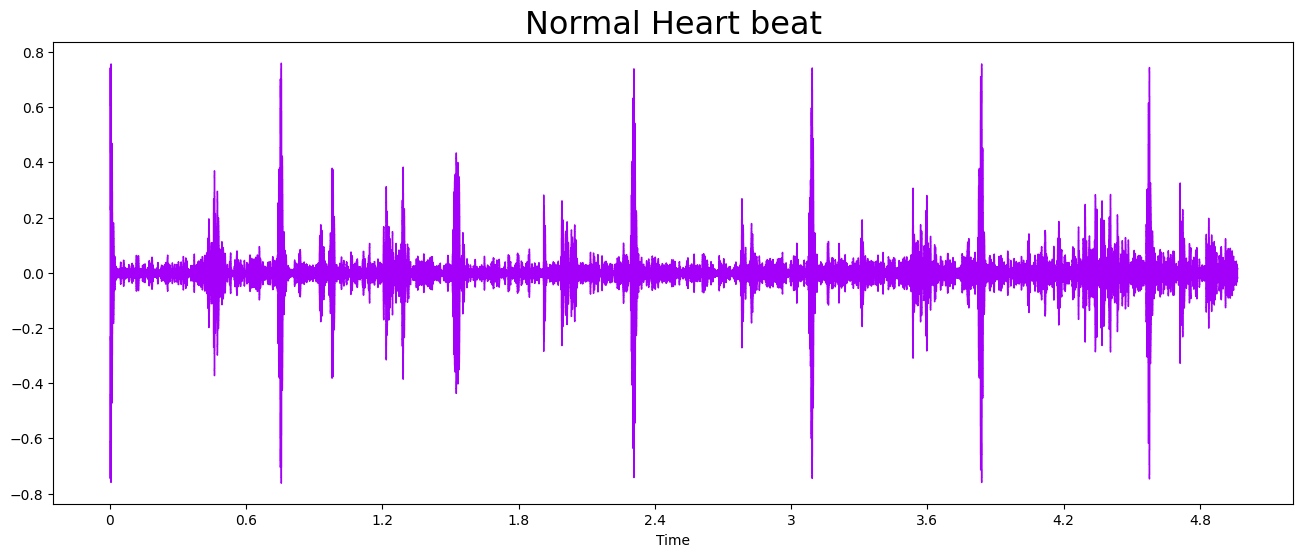

In [17]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow( audio_file, sr = sr, color = "#A300F9");
plt.title("Normal Heart beat", fontsize = 23);

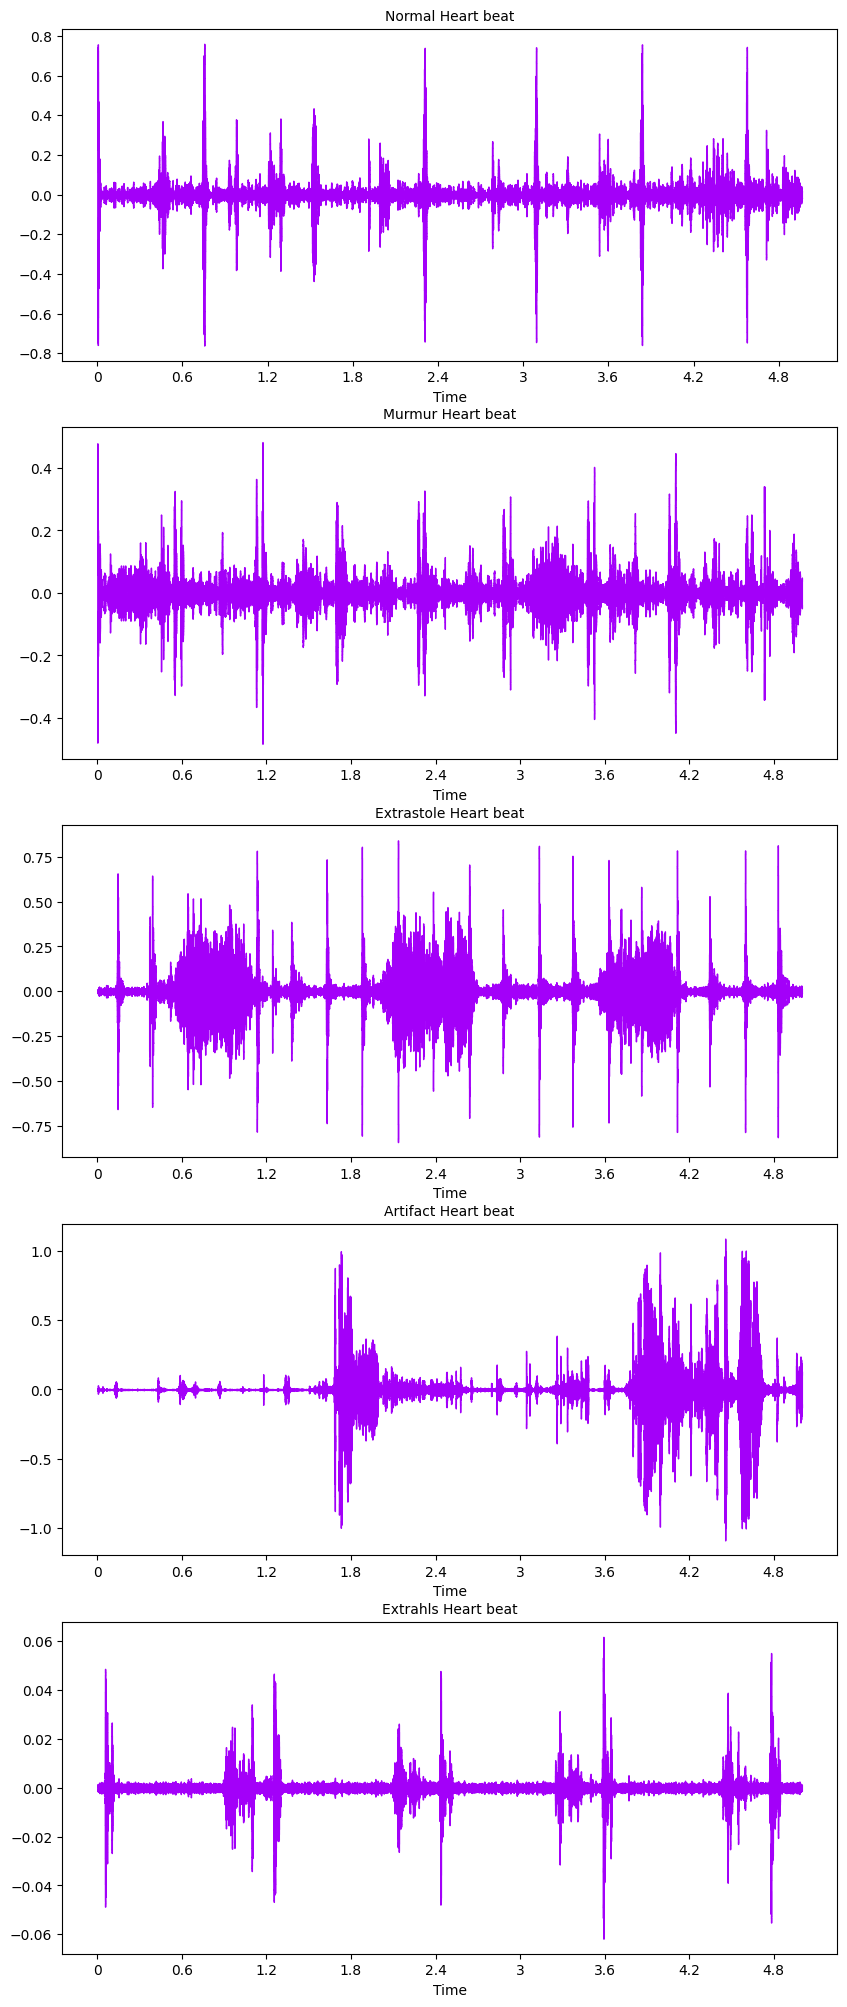

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 25))
#plt.title("Different audio samples")
plt.subplot(5, 1, 1)
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Normal Heart beat", fontsize = 10);

plt.subplot(5, 1, 2)
librosa.display.waveshow(y = audio_file1, sr = sr1, color = "#A300F9");
plt.title("Murmur Heart beat", fontsize = 10);

plt.subplot(5, 1, 3)
librosa.display.waveshow(y = audio_file2, sr = sr2, color = "#A300F9");
plt.title("Extrastole Heart beat", fontsize = 10);

plt.subplot(5, 1, 4)
librosa.display.waveshow(y = audio_file3, sr = sr3, color = "#A300F9");
plt.title("Artifact Heart beat", fontsize = 10);

plt.subplot(5, 1, 5)
librosa.display.waveshow(y = audio_file4, sr = sr4, color = "#A300F9");
plt.title("Extrahls Heart beat", fontsize = 10);

plt.show()
plt.savefig('audio_sample.png')

### Fourier Transform

* Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
* Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [19]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 214)


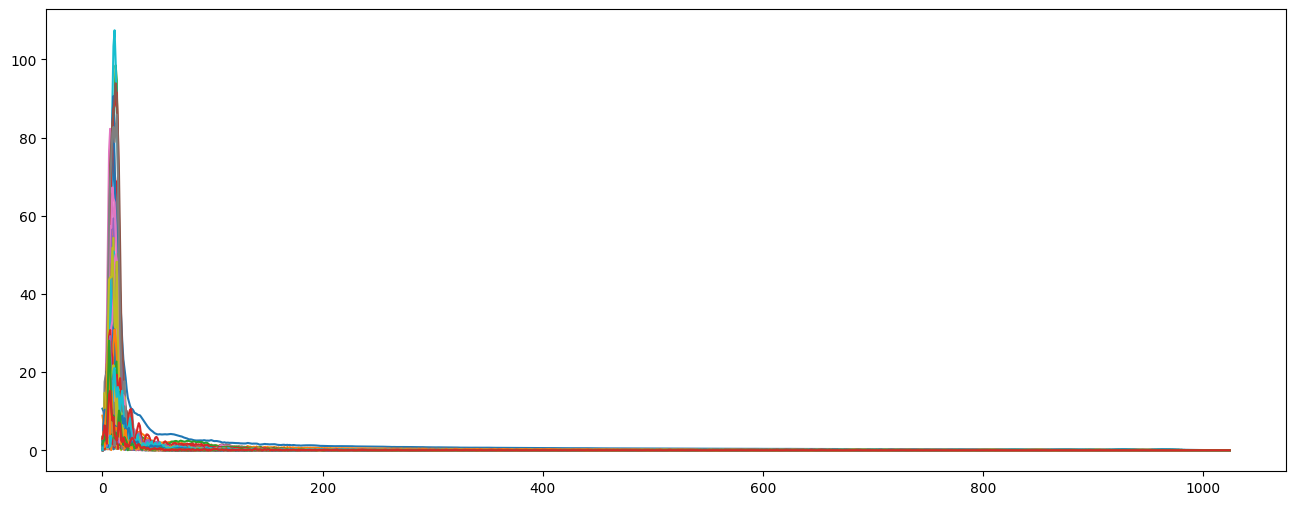

In [20]:
plt.figure(figsize = (16, 6))
plt.plot(D);

### The Spectrogram

* What is a spectrogram? A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams ([wiki](https://en.wikipedia.org/wiki/Spectrogram)).
* Here we convert the frequency axis to a logarithmic one.

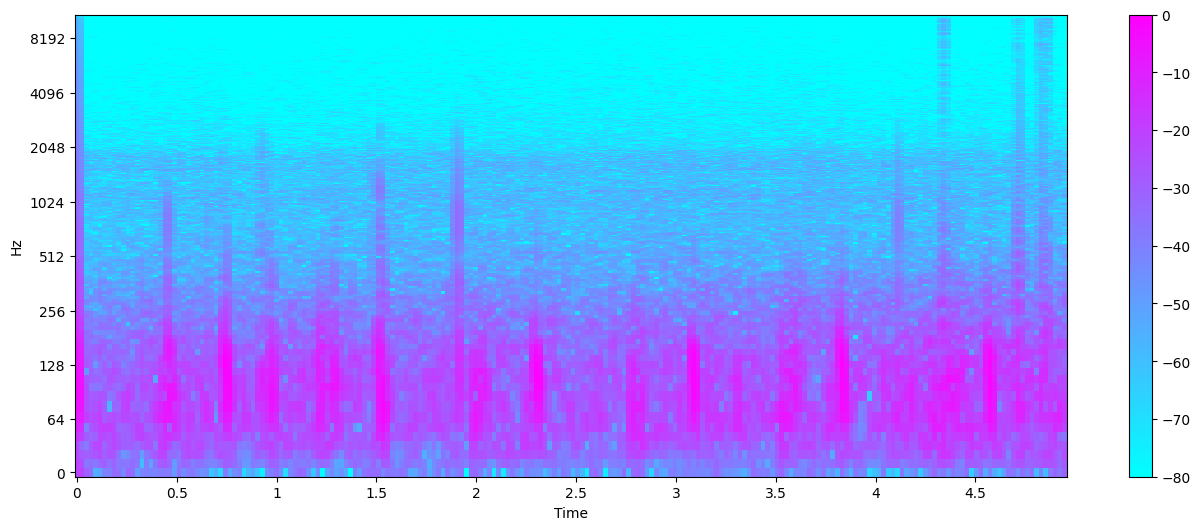

In [21]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();

### Mel Spectrogram

* The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

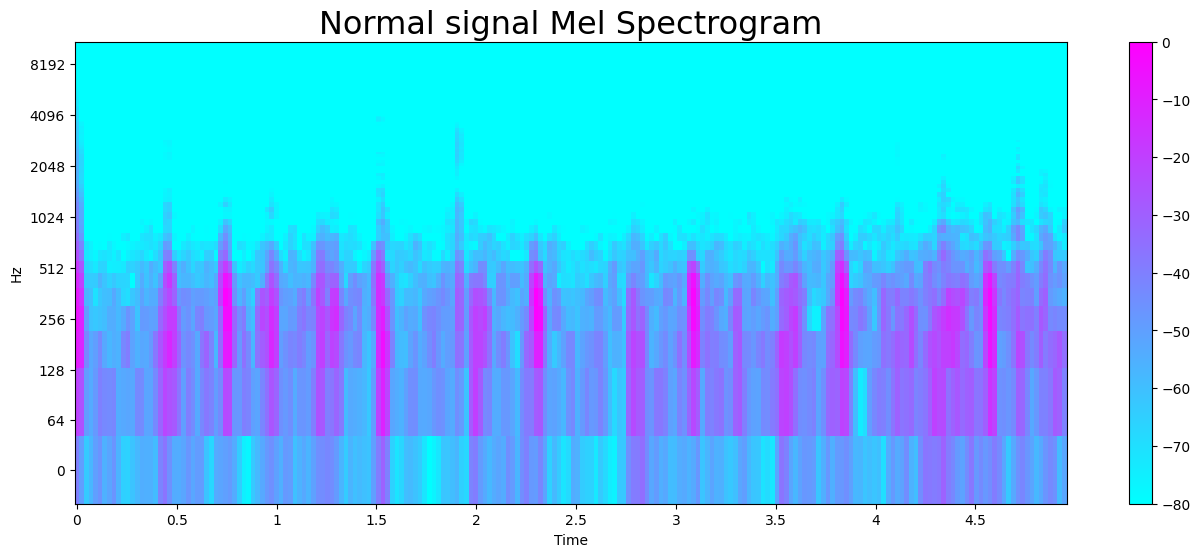

In [22]:
y, sr = librosa.load(normal_file)
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Normal signal Mel Spectrogram", fontsize = 23);

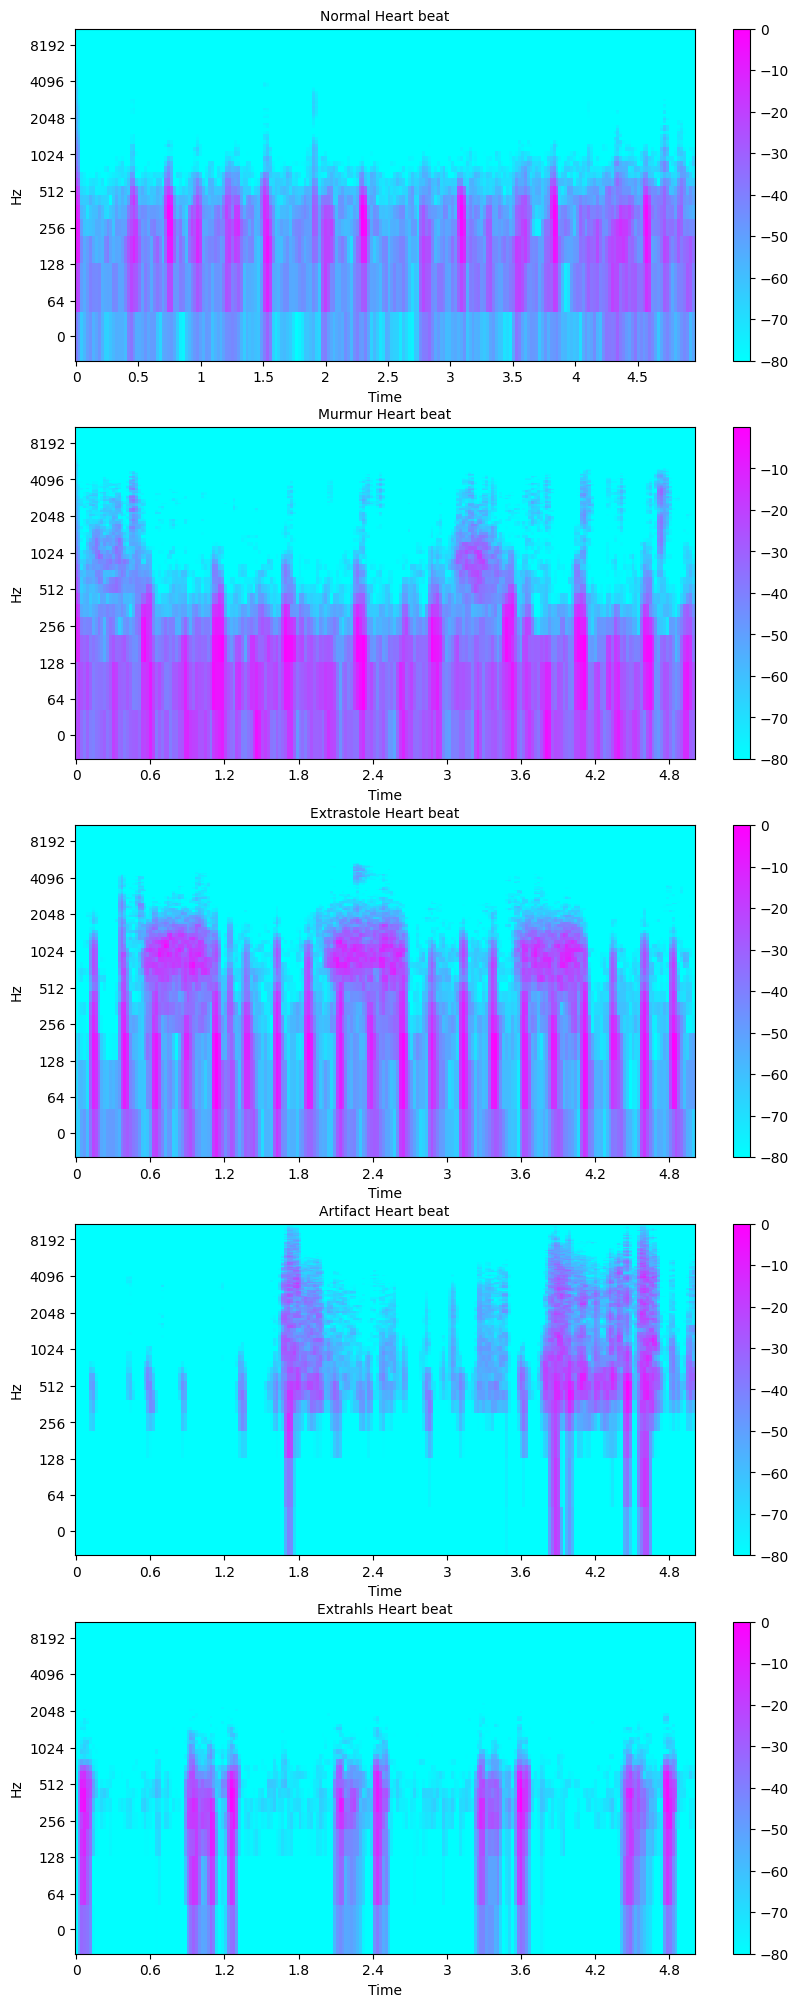

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 25))
#plt.title("Different audio samples")
plt.subplot(5, 1, 1)
S = librosa.feature.melspectrogram(y= y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
#plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Normal Heart beat", fontsize = 10);

plt.subplot(5, 1, 2)
S = librosa.feature.melspectrogram(y= y1, sr=sr1)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
#plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr1, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Murmur Heart beat", fontsize = 10);

plt.subplot(5, 1, 3)
S = librosa.feature.melspectrogram(y=y2, sr=sr2)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
#plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr2, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Extrastole Heart beat", fontsize = 10);

plt.subplot(5, 1, 4)
S = librosa.feature.melspectrogram(y=y3, sr=sr3)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
#plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr3, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Artifact Heart beat", fontsize = 10);

plt.subplot(5, 1, 5)
S = librosa.feature.melspectrogram(y=y4, sr=sr4)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
#plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr4, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool');
plt.colorbar();
plt.title("Extrahls Heart beat", fontsize = 10);

plt.show()
plt.savefig('Mfccsample.png')

## Audio Features

### Zero Crossing Rate

* the rate at which the signal changes from positive to negative or back.

In [24]:
# Total zero_crossings in our 1 song normal
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

1870


In [25]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file1, pad=False)
print("Murmur :",sum(zero_crossings))

# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file2, pad=False)
print("Extrastole :",sum(zero_crossings))

# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file3, pad=False)
print("Artifact :",sum(zero_crossings))

# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file4, pad=False)
print("Extrahls :",sum(zero_crossings))

Murmur : 1455
Extrastole : 2567
Artifact : 11514
Extrahls : 24537


### Harmonics and Perceptrual

* Harmonics are characteristichs that human years can't distinguish (represents the sound color)
* Perceptrual understanding shock wave represents the sound rhythm and emotion

(109452,) (109452,)


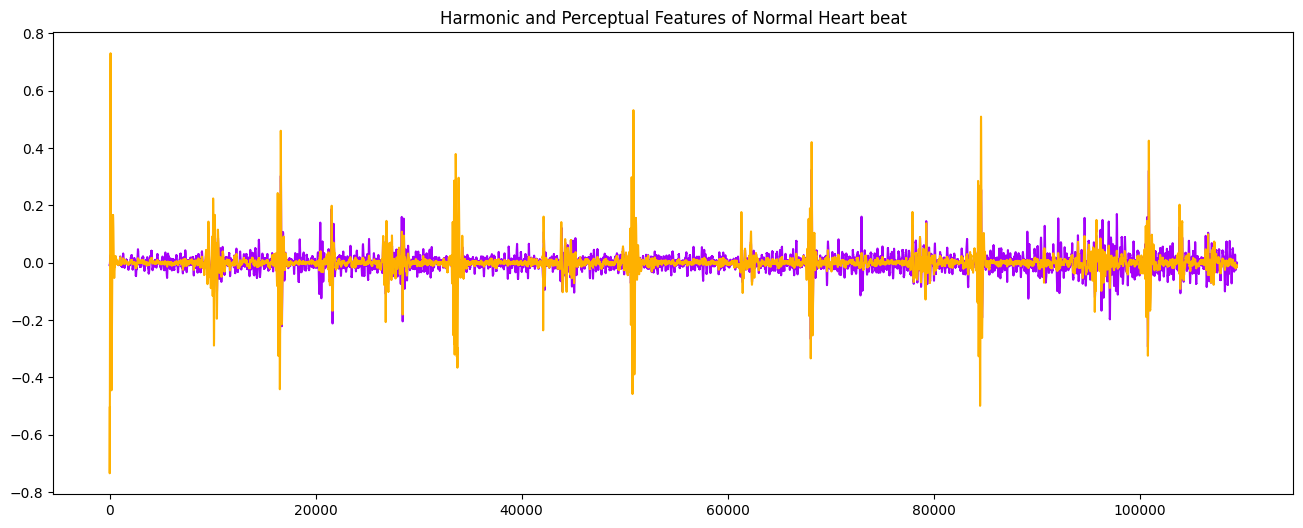

In [26]:
y_harm, y_perc = librosa.effects.hpss(audio_file)
print(y_harm.shape,y_perc.shape)
plt.figure(figsize = (16, 6))
plt.title("Harmonic and Perceptual Features of Normal Heart beat")
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');

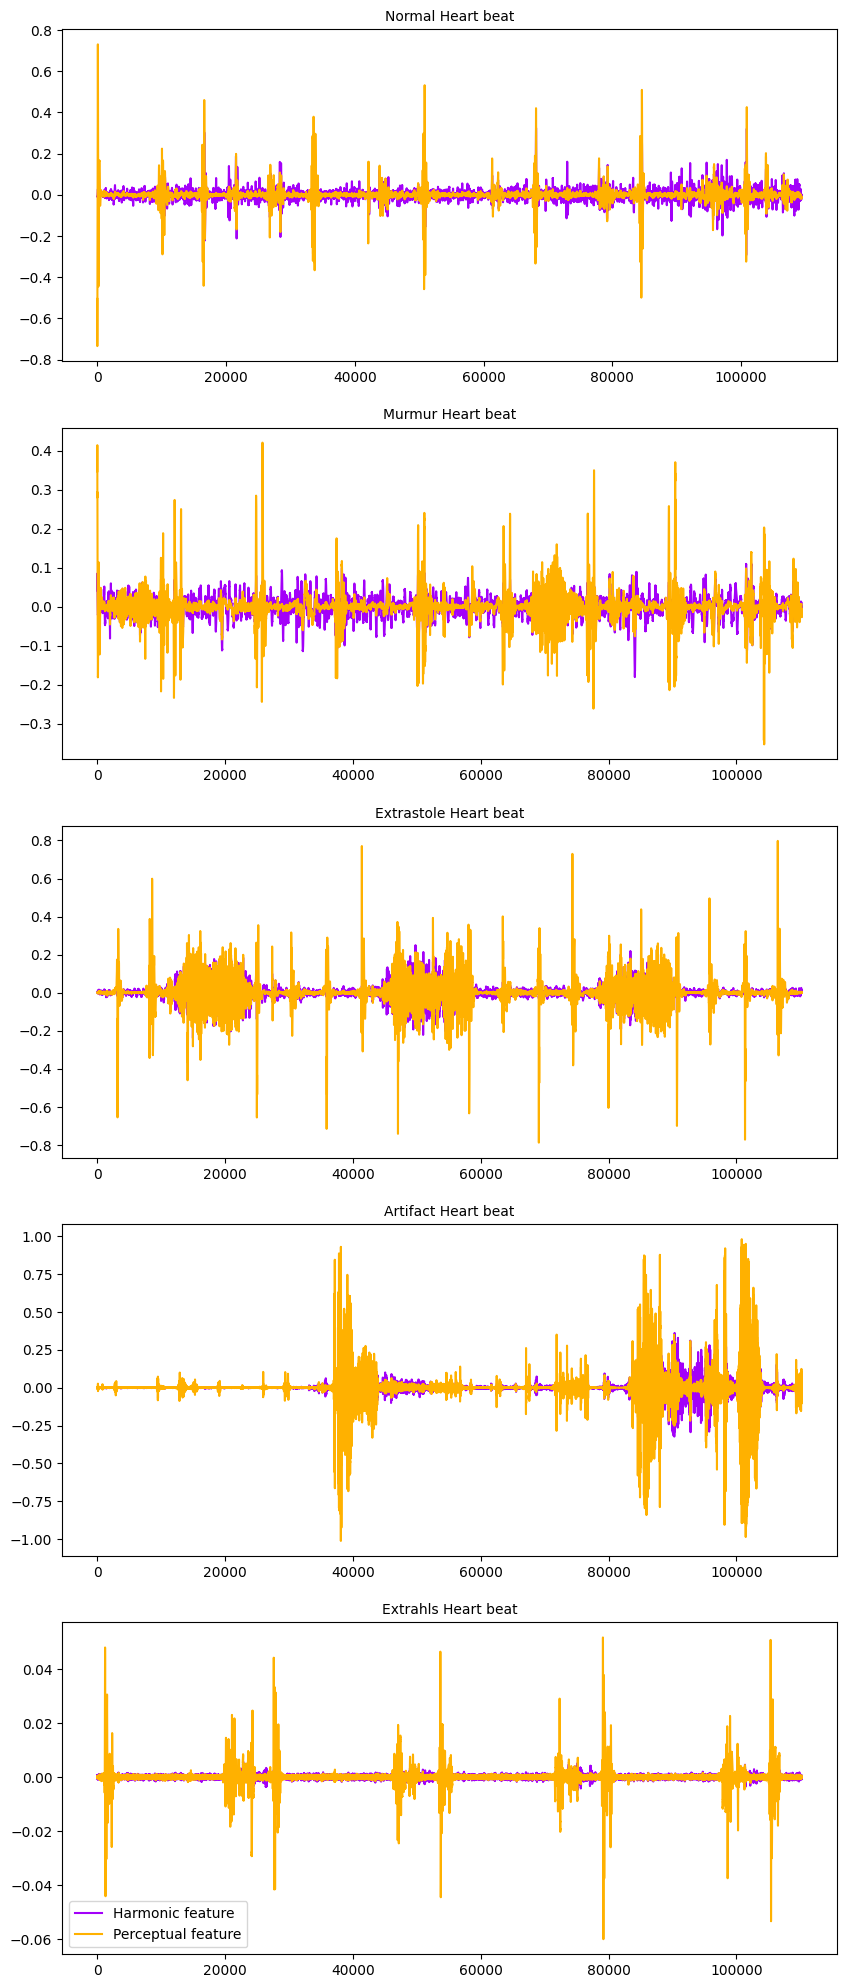

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 25))
#plt.title("Different audio samples")
plt.subplot(5, 1, 1)
y_harm, y_perc = librosa.effects.hpss(audio_file)
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Normal Heart beat", fontsize = 10);

plt.subplot(5, 1, 2)
y_harm, y_perc = librosa.effects.hpss(audio_file1)
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Murmur Heart beat", fontsize = 10);

plt.subplot(5, 1, 3)
y_harm, y_perc = librosa.effects.hpss(audio_file2)
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Extrastole Heart beat", fontsize = 10);

plt.subplot(5, 1, 4)
y_harm, y_perc = librosa.effects.hpss(audio_file3)
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Artifact Heart beat", fontsize = 10);

plt.subplot(5, 1, 5)
y_harm, y_perc = librosa.effects.hpss(audio_file4)
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.title("Extrahls Heart beat", fontsize = 10);

plt.gca().legend(('Harmonic feature','Perceptual feature'))
plt.show()
plt.savefig('hpss_sample.png')

### Tempo BMP (beats per minute)

Dynamic programming beat tracker.

In [28]:
tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
tempo

array([151.99908088])

In [29]:
tempo, _ = librosa.beat.beat_track(y=y1, sr = sr1)
print("Murmur : ",tempo)

tempo, _ = librosa.beat.beat_track(y=y2, sr = sr2)
print("Extrastole : ",tempo)

tempo, _ = librosa.beat.beat_track(y=y3, sr = sr3)
print("Artifact : ",tempo)

tempo, _ = librosa.beat.beat_track(y=y4, sr = sr4)
print("Extrahls : ",tempo)


Murmur :  0.0
Extrastole :  0.0
Artifact :  [107.66601562]
Extrahls :  [95.703125]


### Spectral Centroid

* indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

In [30]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y = audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [1346.77501671 1164.57156898  615.6631102   679.65347722  679.31599616
  532.58459739  624.15885478  637.06736131  572.04776709  733.02472926
  705.16929608  625.61387237  698.23694802  663.40792081  554.9614655
  635.35813657  606.7244856   574.90662564  371.5429971   311.75992327
  292.9460502   298.32167333  476.23221313  582.43642847  482.7403053
  625.81935213  630.47305503  511.4076977   522.50813796  597.34839208
  677.51878285  330.32634229  205.11479879  193.93062464  386.92230063
  581.22696451  454.46852619  570.88010203  669.50509658  505.97451639
  413.77856945  340.47674053  231.81793152  250.92287022  548.78801131
  552.35430421  494.03435801  580.43399685  516.38004004  489.60543342
  581.76778305  429.66316126  258.87537794  270.11418929  363.59552486
  284.0180457   278.44609259  465.35824986  625.88779014  545.60751618
  550.11180611  568.42777261  747.97240766  841.6233094   492.86772393
  313.75050747  268.61803466  296.67426547  628.70512312  812.711106

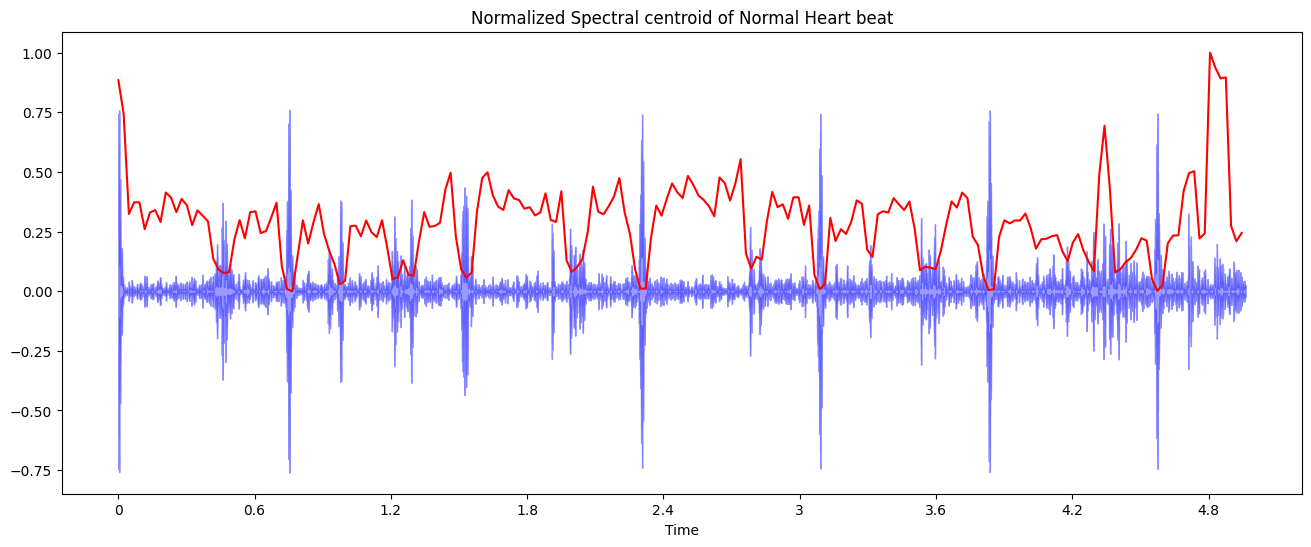

In [31]:
import sklearn
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
plt.title("Normalized Spectral centroid of Normal Heart beat")
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = 'blue');
plt.plot(t, normalize(spectral_centroids), color='red');

### Spectral Rolloff
* is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies

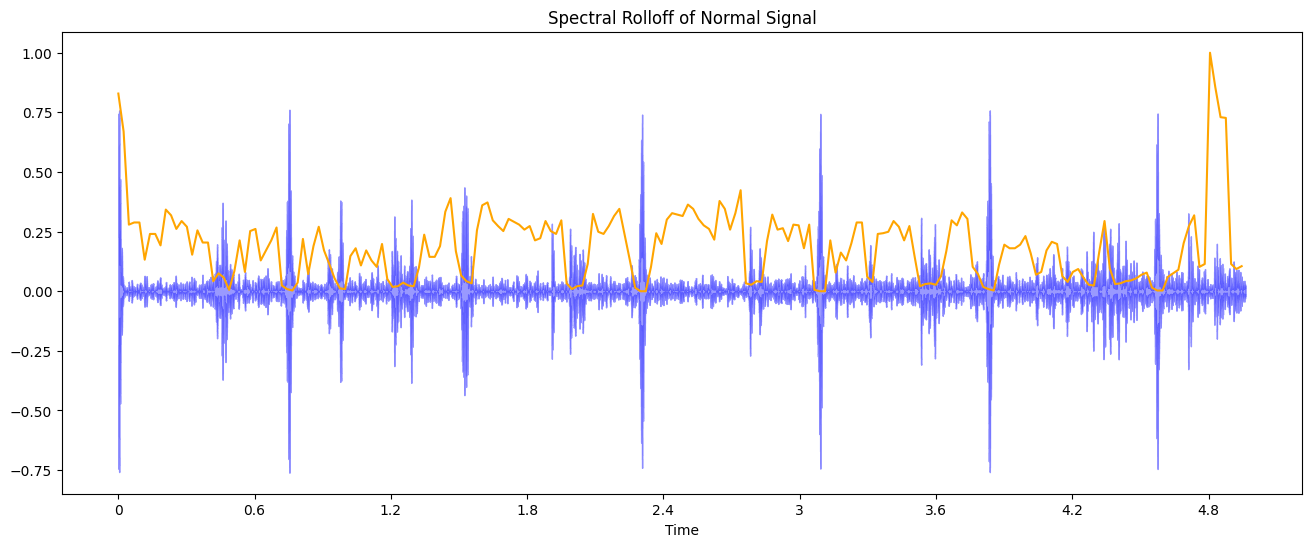

In [32]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y = audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
plt.title("Spectral Rolloff of Normal Signal")
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = 'blue');
plt.plot(t, normalize(spectral_rolloff), color='orange');

### Mel-Frequency Cepstral Coefficients:

* The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

mfccs shape: (20, 214)


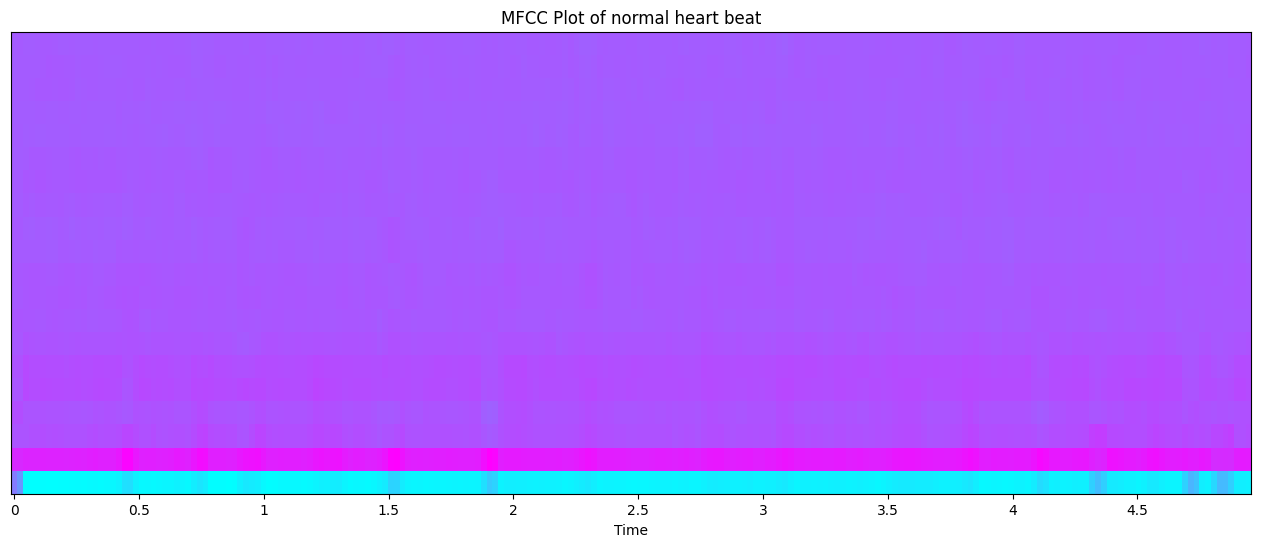

In [33]:
mfccs = librosa.feature.mfcc(y = audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
plt.title("MFCC Plot of normal heart beat")
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

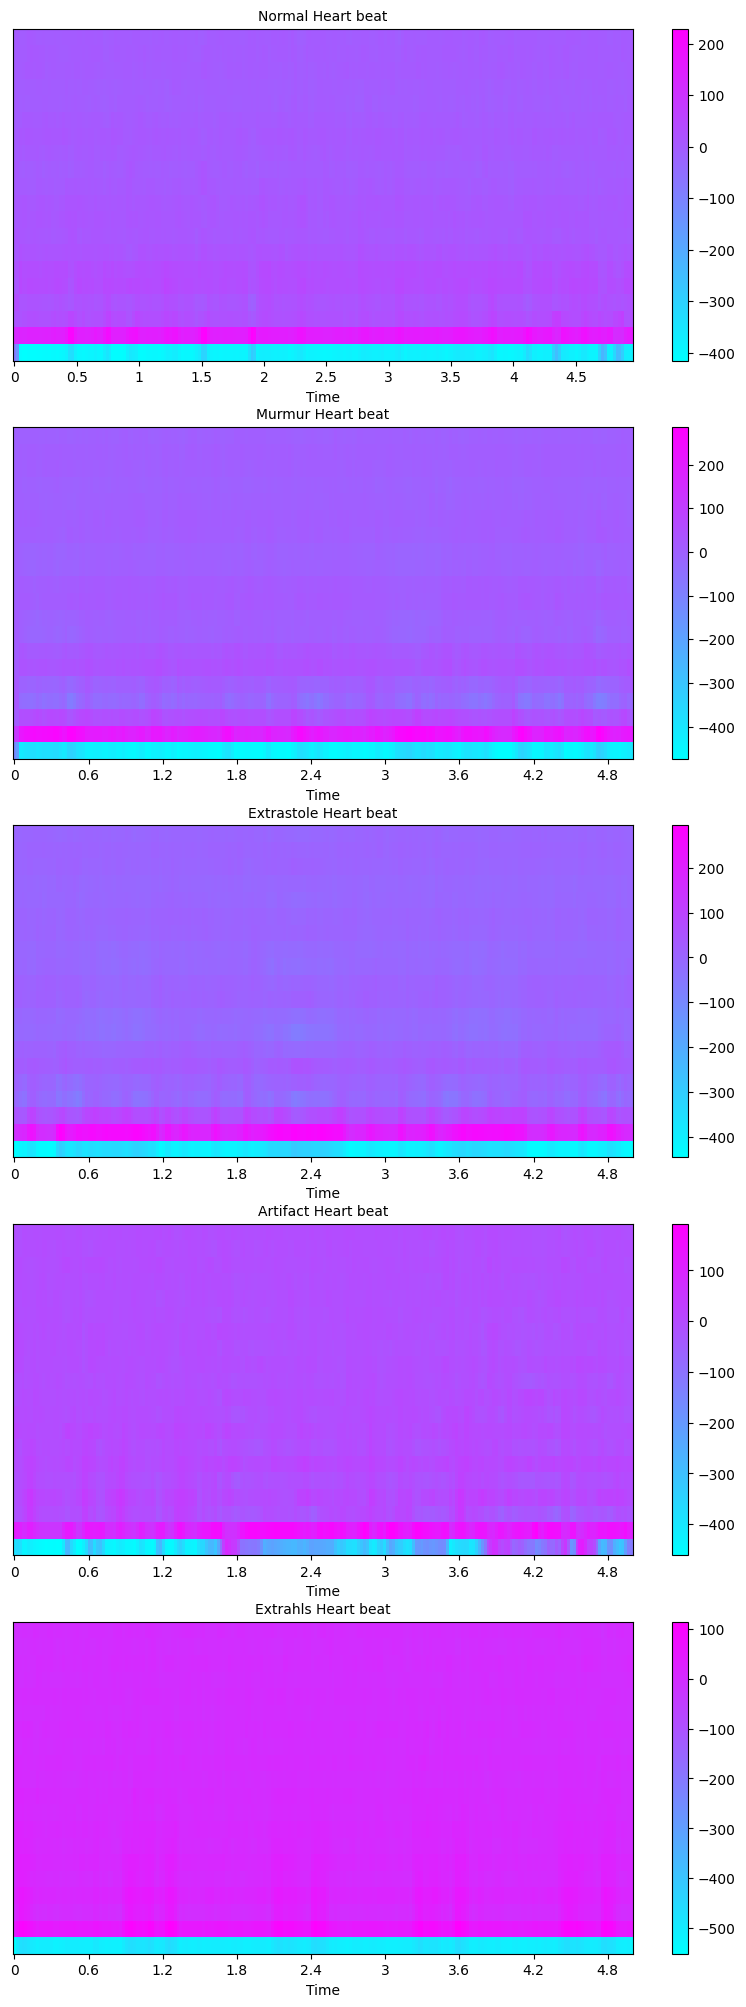

<Figure size 640x480 with 0 Axes>

In [34]:
#"import matplotlib.pyplot as plt
plt.figure(figsize = (10, 25))
#plt.title("Different audio samples")
plt.subplot(5, 1, 1)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
#mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Normal Heart beat", fontsize = 10);

plt.subplot(5, 1, 2)
mfccs = librosa.feature.mfcc(y=audio_file1, sr=sr1)
#mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr1, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Murmur Heart beat", fontsize = 10);

plt.subplot(5, 1, 3)
mfccs = librosa.feature.mfcc(y=audio_file2, sr=sr2)
#mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr2, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Extrastole Heart beat", fontsize = 10);

plt.subplot(5, 1, 4)
mfccs = librosa.feature.mfcc(y=audio_file3, sr=sr3)
#mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr3, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Artifact Heart beat", fontsize = 10);

plt.subplot(5, 1, 5)
mfccs = librosa.feature.mfcc(y=audio_file4, sr=sr4)
#mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr4, x_axis='time', cmap = 'cool');
#plt.gca().legend(('Harmonic feature','Perceptual feature'))
plt.colorbar();
plt.title("Extrahls Heart beat", fontsize = 10);

plt.show()
plt.savefig('mfcc_sample.png')

Mean: 3.863264e-10 

Var: 1.0


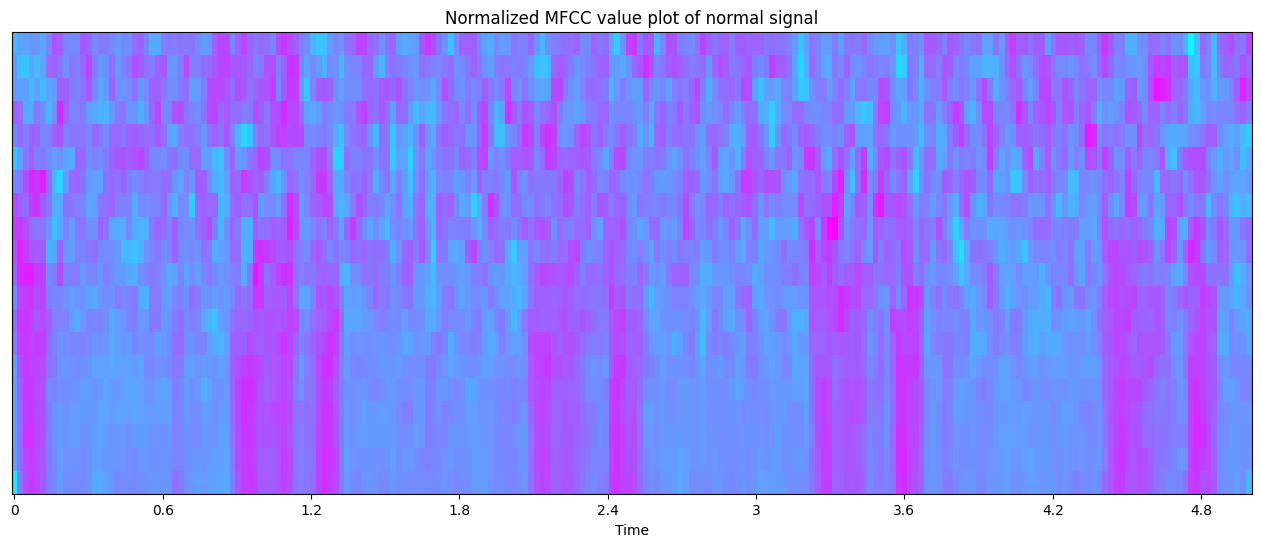

In [35]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
plt.title("Normalized MFCC value plot of normal signal")
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

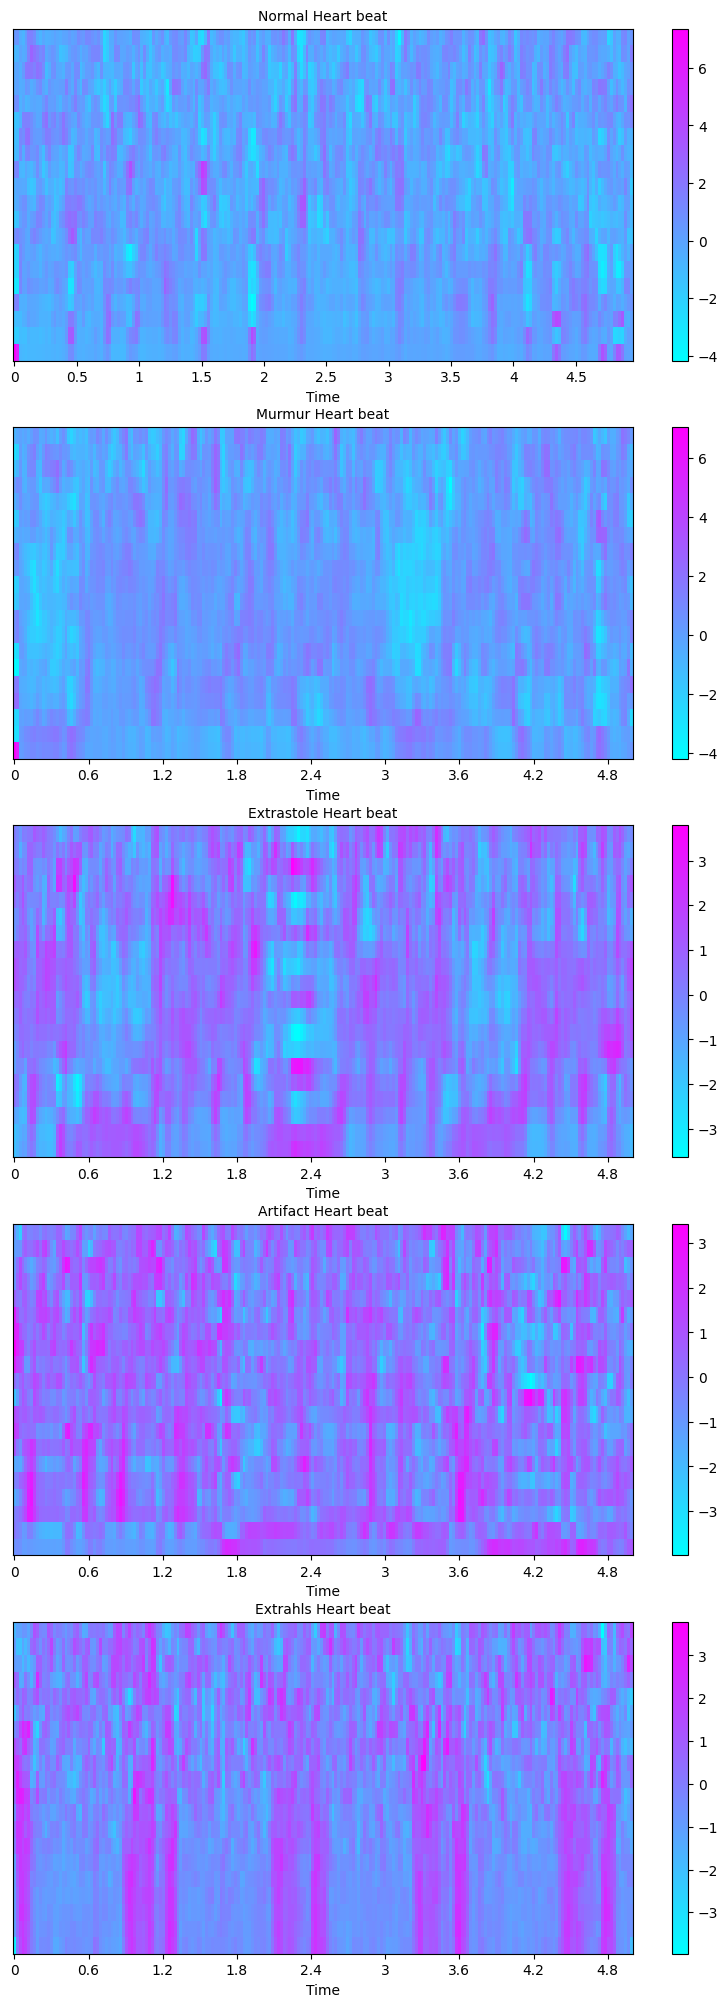

<Figure size 640x480 with 0 Axes>

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 25))
#plt.title("Different audio samples")
plt.subplot(5, 1, 1)
mfccs = librosa.feature.mfcc(y=audio_file, sr=sr)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Normal Heart beat", fontsize = 10);

plt.subplot(5, 1, 2)
mfccs = librosa.feature.mfcc(y=audio_file1, sr=sr1)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr1, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Murmur Heart beat", fontsize = 10);

plt.subplot(5, 1, 3)
mfccs = librosa.feature.mfcc(y=audio_file2, sr=sr2)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr2, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Extrastole Heart beat", fontsize = 10);

plt.subplot(5, 1, 4)
mfccs = librosa.feature.mfcc(y=audio_file3, sr=sr3)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr3, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Artifact Heart beat", fontsize = 10);

plt.subplot(5, 1, 5)
mfccs = librosa.feature.mfcc(y=audio_file4, sr=sr4)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=sr4, x_axis='time', cmap = 'cool');
#plt.gca().legend(('Harmonic feature','Perceptual feature'))
plt.colorbar();
plt.title("Extrahls Heart beat", fontsize = 10);

plt.show()
plt.savefig('mfcc_norm_sample.png')

### Chroma Frequencies

* Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

Chromogram shape: (12, 110)


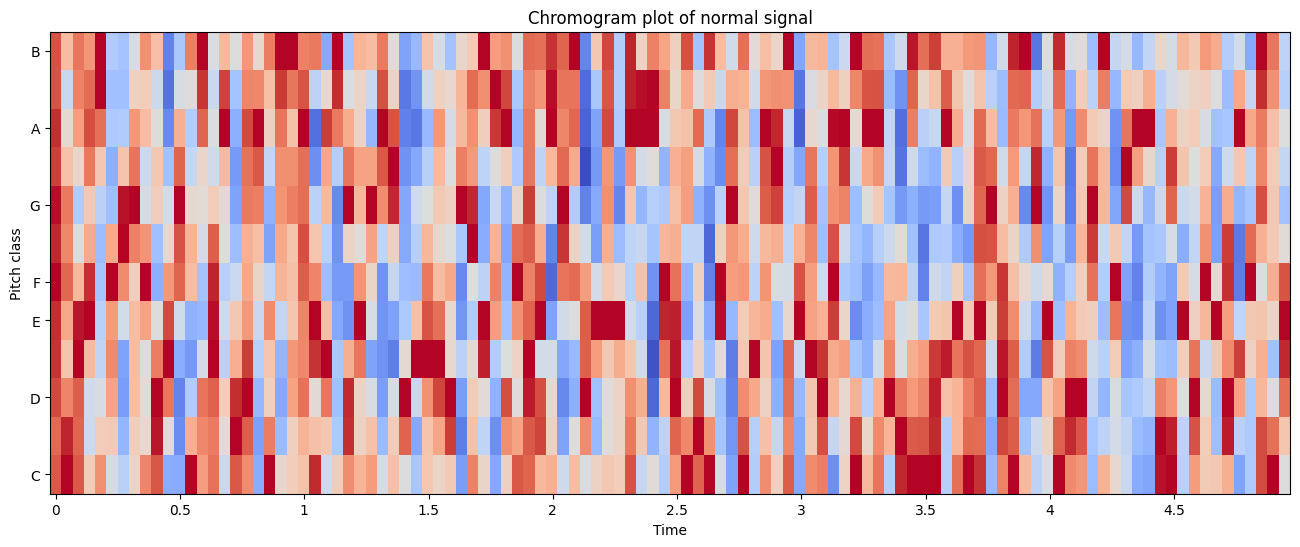

In [37]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 1000

# Chromogram
chromagram = librosa.feature.chroma_stft(y = audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
plt.title("Chromogram plot of normal signal")
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

filename	length	chroma_stft_mean	chroma_stft_var	rms_mean	rms_var	spectral_centroid_mean	spectral_centroid_var	spectral_bandwidth_mean	spectral_bandwidth_var	...	mfcc16_var	mfcc17_mean	mfcc17_var	mfcc18_mean	mfcc18_var	mfcc19_mean	mfcc19_var	mfcc20_mean	mfcc20_var	label

# **1.Normal**

### 2.Murmur

In [38]:
# murmur case
murmur_file=INPUT_DIR+"/set_a/murmur__201108222231.wav"
y2, sr2 = librosa.load(murmur_file,duration=5)
dur=librosa.get_duration(y=y2)
print ("duration:", dur)
print(y2.shape,sr2)

duration: 5.0
(110250,) 22050


In [39]:
# heart it
ipd.Audio(murmur_file)

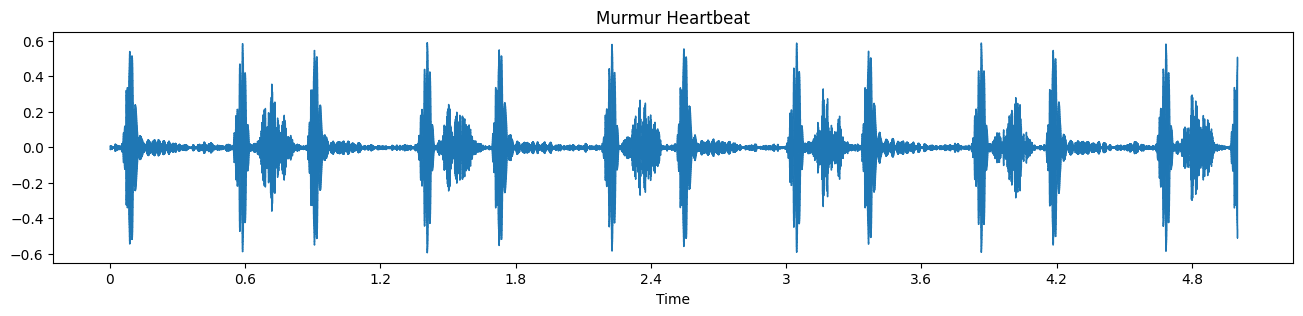

In [40]:
# show it
plt.figure(figsize=(16, 3))
plt.title("Murmur Heartbeat")
librosa.display.waveshow(y=y2, sr=sr2)

### 3. Extrasystole

In [41]:
# Extrasystole case
extrastole_file=INPUT_DIR+"/set_b/extrastole__127_1306764300147_C2.wav"
y3, sr3 = librosa.load(extrastole_file, duration=5)
dur=librosa.get_duration(y=y3)
print ("duration:", dur)
print(y3.shape,sr3)

duration: 4.676009070294785
(103106,) 22050


In [42]:
# hear it
ipd.Audio(extrastole_file)

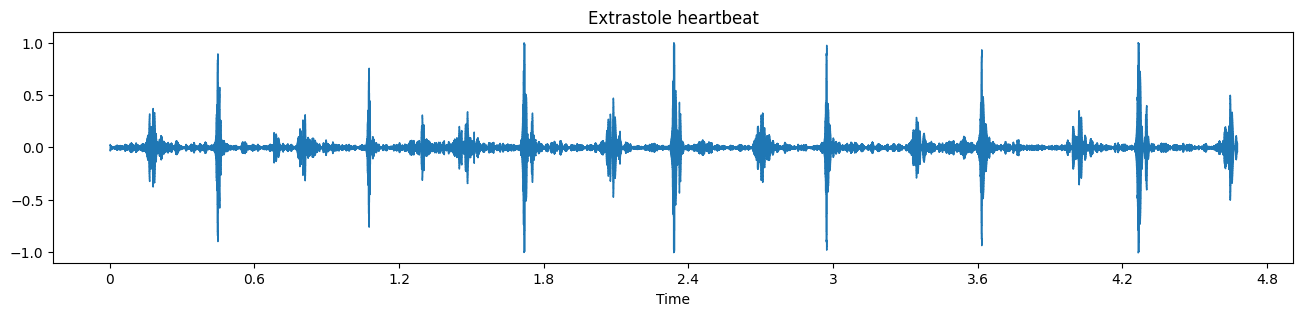

In [43]:
# show it
plt.figure(figsize=(16, 3))
plt.title("Extrastole heartbeat")
librosa.display.waveshow(y = y3, sr=sr3)

### 4.Artifact

In [44]:
# sample file
artifact_file=INPUT_DIR+"/set_a/artifact__201012172012.wav"
y4, sr4 = librosa.load(artifact_file, duration=5)
dur=librosa.get_duration(y= y4)
print ("duration:", dur)
print(y4.shape,sr4)

duration: 5.0
(110250,) 22050


In [45]:
# hear it
ipd.Audio(artifact_file)

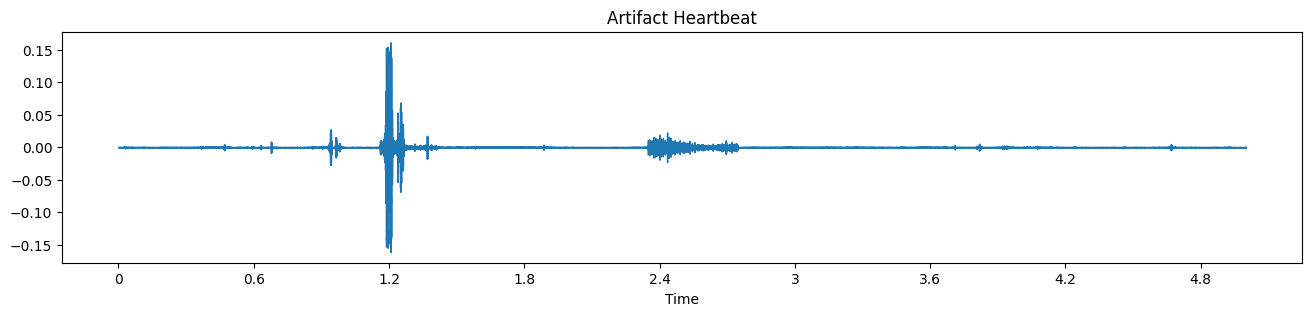

In [46]:
# show it
plt.figure(figsize=(16, 3))
plt.title("Artifact Heartbeat")
librosa.display.waveshow(y4, sr=sr4)

#### 5. Extra Heart Sound

In [47]:
# sample file
extrahls_file=INPUT_DIR+"/set_a/extrahls__201101070953.wav"
y5, sr5 = librosa.load(extrahls_file, duration=5)
dur=librosa.get_duration(y = y5)
print ("duration:", dur)
print(y4.shape,sr4)

duration: 5.0
(110250,) 22050


In [48]:
# heart it

ipd.Audio(extrahls_file)

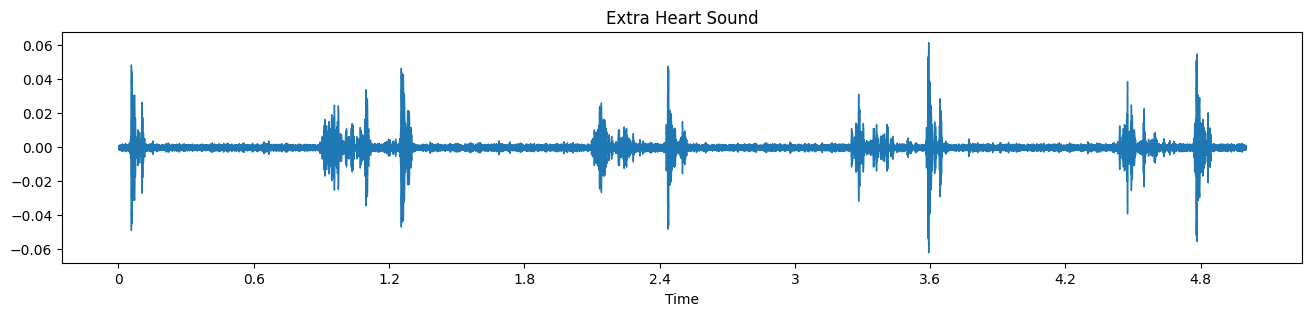

In [49]:
# show it
plt.figure(figsize=(16, 3))
plt.title("Extra Heart Sound")
librosa.display.waveshow(y=y5, sr=sr5)

In [52]:
dataset = []
for folder in [".\\Data\\set_a\\**",".\\Data\\set_b\\**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            duration = librosa.get_duration(filename=filename)
            # skip audio smaller than 3 secs
            if duration>=3:
                slice_size = 3
                iterations = int((duration-slice_size)/(slice_size-1))
                iterations += 1
#                 initial_offset = (duration % slice_size)/2
                initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                    for i in range(iterations):
                        offset = initial_offset + i*(slice_size-1)

                        dataset.append({
                                "filename": filename,
                                "label": label,
                                "offset": offset
                            })


dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1441 entries, 168 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1441 non-null   object 
 1   label     1441 non-null   object 
 2   offset    1441 non-null   float64
dtypes: float64(1), object(2)
memory usage: 45.0+ KB


In [53]:
dataset.label.value_counts()

label
normal        769
murmur        373
artifact      160
extrastole     88
extrahls       51
Name: count, dtype: int64

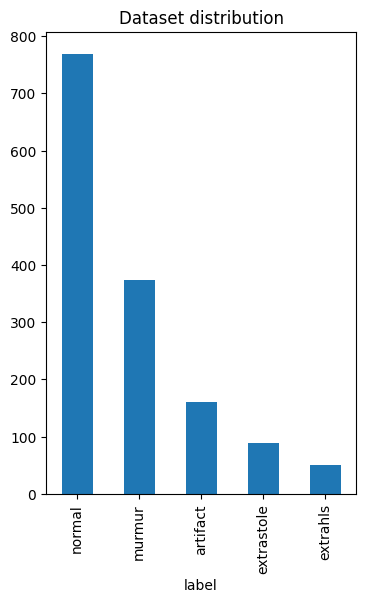

In [54]:
plt.figure(figsize=(4,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()

In [55]:
dataset.tail()

filename   label     offset
1095  .\Data\set_b\normal_noisynormal_207_1308159792...  normal   0.232875
1130  .\Data\set_b\normal_noisynormal_258_1309352253...  normal  22.433500
1294      .\Data\set_b\normal__146_1306778707532_D2.wav  normal   6.103625
860   .\Data\set_b\normal_noisynormal_121_1306263877...  normal   4.621625
1126  .\Data\set_b\normal_noisynormal_258_1309352253...  normal  14.433500

In [56]:
print(dataset.filename[860],dataset.offset[860])

.\Data\set_b\normal_noisynormal_121_1306263877235_A.wav 4.621625


In [57]:
def extract_features1(audio_path,offset):

    y, sr = librosa.load(audio_path, offset=offset, duration=3)


    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048,
                                   hop_length=512,
                                   n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)


    return mfccs.flatten()

In [60]:
def extract_features(audio_path, offset):
    y, sr = librosa.load(audio_path, sr=None, offset=offset)

    # Extracting various features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # Calculating the mean of each feature
    chroma_stft_mean = np.mean(chroma_stft)
    rmse_mean = np.mean(rmse)
    spec_cent_mean = np.mean(spec_cent)
    spec_bw_mean = np.mean(spec_bw)
    rolloff_mean = np.mean(rolloff)
    zcr_mean = np.mean(zcr)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Concatenating all features into a single array
    features = np.array([chroma_stft_mean, rmse_mean, spec_cent_mean, spec_bw_mean, rolloff_mean, zcr_mean])
    # print(features.shape)
    features = np.append(features, mfccs_mean)
    # print(features.shape)
    # Extracting tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features = np.append(features, tempo)

    return features

# Example usage
print(extract_features(dataset.filename[860], dataset.offset[860]))


[ 6.86037958e-01  1.65623240e-02  4.91947871e+02  4.62157945e+02
  1.05479030e+03  1.78139134e-01 -2.23437836e+02  8.78203735e+01
  4.77329636e+00  2.97447224e+01 -1.05657845e+01  1.62309380e+01
 -1.32181730e+01  1.25912142e+01 -1.43330562e+00  7.19255543e+00
 -3.49968147e+00  1.85861588e+00  2.30218792e+00  1.14455462e+00
 -1.68693781e+00 -9.77381945e-01  2.85187793e+00 -3.20723385e-01
  8.09478879e-01 -2.28722811e+00 -1.15139949e+00  1.70244896e+00
 -1.50652385e+00  8.14445019e-02 -1.14713955e+00  7.94843197e-01
 -1.11717772e+00 -8.39208901e-01 -7.56364048e-01  1.30576098e+00
  2.39868522e-01 -1.46941388e+00  1.06886613e+00 -1.44923973e+00
  1.42212555e-01 -1.10654318e+00 -1.18876481e+00  6.88275620e-02
 -6.56444073e-01  5.97464800e-01  7.81250000e+01]


mfccs = 40*130 array

In [61]:
features = []
for idx in tqdm(range(len(dataset))):
    features.append(extract_features(dataset.filename.iloc[idx],dataset.offset.iloc[idx]))
target = np.asarray(features)

features = np.array(features)
print("Features:", features.shape)


100%|██████████| 1441/1441 [04:24<00:00,  5.45it/s]

Features: (1441, 47)


In [84]:
# Encode Labels
encoder = LabelEncoder()
encoder.fit(dataset.label)
print(dataset.label)
print("Encoder",encoder.classes_)

target = encoder.transform(dataset.label)

print("Target",target.shape)

print("Target:", target)
print("Label Mapping:")
for label, encoded_label in zip(encoder.classes_, encoder.transform(encoder.classes_)):
    print(f"{label}: {encoded_label}")

label_mapping_df = pd.DataFrame({
    'Label': encoder.classes_,
    'EncodedLabel': encoder.transform(encoder.classes_)
})

# Save the DataFrame to a CSV file
label_mapping_df.to_csv('label_encoding_mapping.csv', index=False)

168     extrahls
1001      normal
549       murmur
65      artifact
629       murmur
          ...   
1095      normal
1130      normal
1294      normal
860       normal
1126      normal
Name: label, Length: 1441, dtype: object
Encoder ['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
Target (1441,)
Target: [1 4 3 ... 4 4 4]
Label Mapping:
artifact: 0
extrahls: 1
extrastole: 2
murmur: 3
normal: 4


In [82]:
print(target)
print(len(target))

[1 4 3 ... 4 4 4]
1441


In [64]:
print(features.shape)

(1441, 47)


In [65]:
col = ["chroma_stft_mean", "rmse_mean", "spec_cent_mean", "spec_bw_mean", "rolloff_mean", "zcr_mean","mfccs_coef1","mfccs_coef2","mfccs_coef3","mfccs_coef4","mfccs_coef5","mfccs_coef6","mfccs_coef7","mfccs_coef8","mfccs_coef9","mfccs_coef10","mfccs_coef11","mfccs_coef12","mfccs_coef13","mfccs_coef14","mfccs_coef15","mfccs_coef16","mfccs_coef17","mfccs_coef18","mfccs_coef19","mfccs_coef20","mfccs_coef21","mfccs_coef22","mfccs_coef23","mfccs_coef24","mfccs_coef25","mfccs_coef26","mfccs_coef27","mfccs_coef28","mfccs_coef29","mfccs_coef30","mfccs_coef31","mfccs_coef32","mfccs_coef33","mfccs_coef34","mfccs_coef35","mfccs_coef36","mfccs_coef37","mfccs_coef38","mfccs_coef39","mfccs_coef20","tempo"]
df = pd.DataFrame(features, columns = col  )
pd.set_option('display.max_columns', None)
df.tail()

chroma_stft_mean  rmse_mean  spec_cent_mean  spec_bw_mean  rolloff_mean  \
1436          0.707197   0.056835      308.455632    400.875272    671.668419   
1437          0.704009   0.154303      336.203095    409.831945    777.389172   
1438          0.719000   0.092920      198.972847    270.807018    369.609375   
1439          0.686038   0.016562      491.947871    462.157945   1054.790296   
1440          0.708638   0.166526      327.005927    401.277870    751.469494   

      zcr_mean  mfccs_coef1  mfccs_coef2  mfccs_coef3  mfccs_coef4  \
1436  0.106262  -177.914154    99.407028    19.371834    36.087063   
1437  0.080339   -95.084038   101.726639     0.815379    45.392426   
1438  0.057871  -191.544708   150.900192    32.463303    41.300835   
1439  0.178139  -223.437836    87.820374     4.773296    29.744722   
1440  0.078041   -95.342400   103.679001    -0.160985    46.863884   

      mfccs_coef5  mfccs_coef6  mfccs_coef7  mfccs_coef8  mfccs_coef9  \
1436     6.367099    28.088009     4.745399     8.250837     1.710121   
1437     7.913141    28.004511     4.297343    14.822704    -0.154380   
1438    -8.277935    21.595163     2.652329    20.449926     5.758522   
1439   -10.565784    16.230938   -13.218173    12.591214    -1.433306   
1440     7.993599    30.073553     4.351229    14.923377    -0.121125   

      mfccs_coef10  mfccs_coef11  mfccs_coef12  mfccs_coef13  mfccs_coef14  \
1436     11.088001      7.614504      3.186233      2.626994      7.966338   
1437      7.228589      1.579835      5.457633     -0.636304      1.755608   
1438     10.962076     -0.976575      0.755061     -0.785797     -2.694461   
1439      7.192555     -3.499681      1.858616      2.302188      1.144555   
1440      8.268544      1.971976      4.808360     -0.805555      1.595243   

      mfccs_coef15  mfccs_coef16  mfccs_coef17  mfccs_coef18  mfccs_coef19  \
1436     -0.852264      2.608746      5.007357     -0.281419     -2.821187   
1437     -2.209158      0.341946     -0.623054      0.902049      1.421556   
1438     -1.020336     -3.130660      1.770857      0.718157      1.382744   
1439     -1.686938     -0.977382      2.851878     -0.320723      0.809479   
1440     -1.443084      0.894167     -1.109017      0.441029     -0.401911   

      mfccs_coef20  mfccs_coef21  mfccs_coef22  mfccs_coef23  mfccs_coef24  \
1436      1.873608     -1.811204      0.729205     -5.252305     -0.768132   
1437      0.715840     -3.500328      1.271254     -3.952744     -1.115654   
1438     -3.039309     -1.336662     -0.922234     -5.252396     -3.355385   
1439     -2.287228     -1.151399      1.702449     -1.506524      0.081445   
1440      0.773359     -2.823442      2.063158     -2.994967     -0.717822   

      mfccs_coef25  mfccs_coef26  mfccs_coef27  mfccs_coef28  mfccs_coef29  \
1436     -4.914655      0.371949     -1.977488     -0.780625     -5.251491   
1437     -3.699390     -2.280029     -3.249487     -1.410484     -2.114822   
1438     -6.549098     -2.936379     -4.492813     -4.390308     -2.151900   
1439     -1.147140      0.794843     -1.117178     -0.839209     -0.756364   
1440     -3.318566     -1.666548     -3.399903     -1.395959     -2.964570   

      mfccs_coef30  mfccs_coef31  mfccs_coef32  mfccs_coef33  mfccs_coef34  \
1436      2.933190     -1.450122     -1.519139     -0.993940      1.247955   
1437     -3.429338     -3.423886     -1.044224     -0.709354     -2.564778   
1438     -1.907971     -0.875473     -3.019629     -2.098285     -3.230279   
1439      1.305761      0.239869     -1.469414      1.068866     -1.449240   
1440     -2.356431     -3.081234     -1.979579     -1.679820     -2.964240   

      mfccs_coef35  mfccs_coef36  mfccs_coef37  mfccs_coef38  mfccs_coef39  \
1436     -1.957869     -0.103926     -2.910583      1.131087     -2.278229   
1437     -1.057451     -1.567100     -2.346160     -0.877804     -3.172443   
1438      0.412948     -0.767851     -1.450178     -0.109000     -1.770133   
14

In [66]:
df["target"] = target
pd.set_option('display.max_columns', None)
df.tail(5)

chroma_stft_mean  rmse_mean  spec_cent_mean  spec_bw_mean  rolloff_mean  \
1436          0.707197   0.056835      308.455632    400.875272    671.668419   
1437          0.704009   0.154303      336.203095    409.831945    777.389172   
1438          0.719000   0.092920      198.972847    270.807018    369.609375   
1439          0.686038   0.016562      491.947871    462.157945   1054.790296   
1440          0.708638   0.166526      327.005927    401.277870    751.469494   

      zcr_mean  mfccs_coef1  mfccs_coef2  mfccs_coef3  mfccs_coef4  \
1436  0.106262  -177.914154    99.407028    19.371834    36.087063   
1437  0.080339   -95.084038   101.726639     0.815379    45.392426   
1438  0.057871  -191.544708   150.900192    32.463303    41.300835   
1439  0.178139  -223.437836    87.820374     4.773296    29.744722   
1440  0.078041   -95.342400   103.679001    -0.160985    46.863884   

      mfccs_coef5  mfccs_coef6  mfccs_coef7  mfccs_coef8  mfccs_coef9  \
1436     6.367099    28.088009     4.745399     8.250837     1.710121   
1437     7.913141    28.004511     4.297343    14.822704    -0.154380   
1438    -8.277935    21.595163     2.652329    20.449926     5.758522   
1439   -10.565784    16.230938   -13.218173    12.591214    -1.433306   
1440     7.993599    30.073553     4.351229    14.923377    -0.121125   

      mfccs_coef10  mfccs_coef11  mfccs_coef12  mfccs_coef13  mfccs_coef14  \
1436     11.088001      7.614504      3.186233      2.626994      7.966338   
1437      7.228589      1.579835      5.457633     -0.636304      1.755608   
1438     10.962076     -0.976575      0.755061     -0.785797     -2.694461   
1439      7.192555     -3.499681      1.858616      2.302188      1.144555   
1440      8.268544      1.971976      4.808360     -0.805555      1.595243   

      mfccs_coef15  mfccs_coef16  mfccs_coef17  mfccs_coef18  mfccs_coef19  \
1436     -0.852264      2.608746      5.007357     -0.281419     -2.821187   
1437     -2.209158      0.341946     -0.623054      0.902049      1.421556   
1438     -1.020336     -3.130660      1.770857      0.718157      1.382744   
1439     -1.686938     -0.977382      2.851878     -0.320723      0.809479   
1440     -1.443084      0.894167     -1.109017      0.441029     -0.401911   

      mfccs_coef20  mfccs_coef21  mfccs_coef22  mfccs_coef23  mfccs_coef24  \
1436      1.873608     -1.811204      0.729205     -5.252305     -0.768132   
1437      0.715840     -3.500328      1.271254     -3.952744     -1.115654   
1438     -3.039309     -1.336662     -0.922234     -5.252396     -3.355385   
1439     -2.287228     -1.151399      1.702449     -1.506524      0.081445   
1440      0.773359     -2.823442      2.063158     -2.994967     -0.717822   

      mfccs_coef25  mfccs_coef26  mfccs_coef27  mfccs_coef28  mfccs_coef29  \
1436     -4.914655      0.371949     -1.977488     -0.780625     -5.251491   
1437     -3.699390     -2.280029     -3.249487     -1.410484     -2.114822   
1438     -6.549098     -2.936379     -4.492813     -4.390308     -2.151900   
1439     -1.147140      0.794843     -1.117178     -0.839209     -0.756364   
1440     -3.318566     -1.666548     -3.399903     -1.395959     -2.964570   

      mfccs_coef30  mfccs_coef31  mfccs_coef32  mfccs_coef33  mfccs_coef34  \
1436      2.933190     -1.450122     -1.519139     -0.993940      1.247955   
1437     -3.429338     -3.423886     -1.044224     -0.709354     -2.564778   
1438     -1.907971     -0.875473     -3.019629     -2.098285     -3.230279   
1439      1.305761      0.239869     -1.469414      1.068866     -1.449240   
1440     -2.356431     -3.081234     -1.979579     -1.679820     -2.964240   

      mfccs_coef35  mfccs_coef36  mfccs_coef37  mfccs_coef38  mfccs_coef39  \
1436     -1.957869     -0.103926     -2.910583      1.131087     -2.278229   
1437     -1.057451     -1.567100     -2.346160     -0.877804     -3.172443   
1438      0.412948     -0.767851     -1.450178     -0.109000     -1.770133   
14

In [67]:
#shuffling the dataframe
# df = shuffle(df, random_state=42).reset_index(drop=True)
df.tail(5)


chroma_stft_mean  rmse_mean  spec_cent_mean  spec_bw_mean  rolloff_mean  \
1436          0.707197   0.056835      308.455632    400.875272    671.668419   
1437          0.704009   0.154303      336.203095    409.831945    777.389172   
1438          0.719000   0.092920      198.972847    270.807018    369.609375   
1439          0.686038   0.016562      491.947871    462.157945   1054.790296   
1440          0.708638   0.166526      327.005927    401.277870    751.469494   

      zcr_mean  mfccs_coef1  mfccs_coef2  mfccs_coef3  mfccs_coef4  \
1436  0.106262  -177.914154    99.407028    19.371834    36.087063   
1437  0.080339   -95.084038   101.726639     0.815379    45.392426   
1438  0.057871  -191.544708   150.900192    32.463303    41.300835   
1439  0.178139  -223.437836    87.820374     4.773296    29.744722   
1440  0.078041   -95.342400   103.679001    -0.160985    46.863884   

      mfccs_coef5  mfccs_coef6  mfccs_coef7  mfccs_coef8  mfccs_coef9  \
1436     6.367099    28.088009     4.745399     8.250837     1.710121   
1437     7.913141    28.004511     4.297343    14.822704    -0.154380   
1438    -8.277935    21.595163     2.652329    20.449926     5.758522   
1439   -10.565784    16.230938   -13.218173    12.591214    -1.433306   
1440     7.993599    30.073553     4.351229    14.923377    -0.121125   

      mfccs_coef10  mfccs_coef11  mfccs_coef12  mfccs_coef13  mfccs_coef14  \
1436     11.088001      7.614504      3.186233      2.626994      7.966338   
1437      7.228589      1.579835      5.457633     -0.636304      1.755608   
1438     10.962076     -0.976575      0.755061     -0.785797     -2.694461   
1439      7.192555     -3.499681      1.858616      2.302188      1.144555   
1440      8.268544      1.971976      4.808360     -0.805555      1.595243   

      mfccs_coef15  mfccs_coef16  mfccs_coef17  mfccs_coef18  mfccs_coef19  \
1436     -0.852264      2.608746      5.007357     -0.281419     -2.821187   
1437     -2.209158      0.341946     -0.623054      0.902049      1.421556   
1438     -1.020336     -3.130660      1.770857      0.718157      1.382744   
1439     -1.686938     -0.977382      2.851878     -0.320723      0.809479   
1440     -1.443084      0.894167     -1.109017      0.441029     -0.401911   

      mfccs_coef20  mfccs_coef21  mfccs_coef22  mfccs_coef23  mfccs_coef24  \
1436      1.873608     -1.811204      0.729205     -5.252305     -0.768132   
1437      0.715840     -3.500328      1.271254     -3.952744     -1.115654   
1438     -3.039309     -1.336662     -0.922234     -5.252396     -3.355385   
1439     -2.287228     -1.151399      1.702449     -1.506524      0.081445   
1440      0.773359     -2.823442      2.063158     -2.994967     -0.717822   

      mfccs_coef25  mfccs_coef26  mfccs_coef27  mfccs_coef28  mfccs_coef29  \
1436     -4.914655      0.371949     -1.977488     -0.780625     -5.251491   
1437     -3.699390     -2.280029     -3.249487     -1.410484     -2.114822   
1438     -6.549098     -2.936379     -4.492813     -4.390308     -2.151900   
1439     -1.147140      0.794843     -1.117178     -0.839209     -0.756364   
1440     -3.318566     -1.666548     -3.399903     -1.395959     -2.964570   

      mfccs_coef30  mfccs_coef31  mfccs_coef32  mfccs_coef33  mfccs_coef34  \
1436      2.933190     -1.450122     -1.519139     -0.993940      1.247955   
1437     -3.429338     -3.423886     -1.044224     -0.709354     -2.564778   
1438     -1.907971     -0.875473     -3.019629     -2.098285     -3.230279   
1439      1.305761      0.239869     -1.469414      1.068866     -1.449240   
1440     -2.356431     -3.081234     -1.979579     -1.679820     -2.964240   

      mfccs_coef35  mfccs_coef36  mfccs_coef37  mfccs_coef38  mfccs_coef39  \
1436     -1.957869     -0.103926     -2.910583      1.131087     -2.278229   
1437     -1.057451     -1.567100     -2.346160     -0.877804     -3.172443   
1438      0.412948     -0.767851     -1.450178     -0.109000     -1.770133   
14

In [ ]:
# saving the dataframe
# df.to_csv('heartsignal_data_new.csv')

In [68]:
def extract_features1(audio_path,offset):
    y, sr = librosa.load(audio_path, sr=None, offset=offset)

    # Extracting various features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

    # Calculating the mean of each feature
    chroma_stft_mean = np.mean(chroma_stft)
    rmse_mean = np.mean(rmse)
    spec_cent_mean = np.mean(spec_cent)
    spec_bw_mean = np.mean(spec_bw)
    rolloff_mean = np.mean(rolloff)
    zcr_mean = np.mean(zcr)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Concatenating all features into a single array
    features = np.array([audio_path, offset, chroma_stft_mean, rmse_mean, spec_cent_mean, spec_bw_mean, rolloff_mean, zcr_mean])
    # print(features.shape)
    features = np.append(features, mfccs_mean)
    # print(features.shape)
    # Extracting tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features = np.append(features, tempo)

    return features

print(extract_features1(dataset.filename[860],dataset.offset[860]))

['.\\Data\\set_b\\normal_noisynormal_121_1306263877235_A.wav' '4.621625'
 '0.68603796' '0.016562324' '491.9478705591914' '462.1579453956779'
 '1054.7902960526317' '0.17813913445723684' '-223.43784' '87.82037'
 '4.7732964' '29.744722' '-10.565784' '16.230938' '-13.218173' '12.591214'
 '-1.4333056' '7.1925554' '-3.4996815' '1.8586159' '2.302188' '1.1445546'
 '-1.6869378' '-0.97738194' '2.851878' '-0.32072338' '0.8094789'
 '-2.287228' '-1.1513995' '1.702449' '-1.5065238' '0.0814445' '-1.1471395'
 '0.7948432' '-1.1171777' '-0.8392089' '-0.75636405' '1.305761'
 '0.23986852' '-1.4694139' '1.0688661' '-1.4492397' '0.14221255'
 '-1.1065432' '-1.1887648' '0.06882756' '-0.6564441' '0.5974648' '78.125']


In [76]:
features = []
for idx in tqdm(range(len(dataset))):
    features.append(extract_features1(dataset.filename.iloc[idx],dataset.offset.iloc[idx]))
target = np.asarray(features)

features = np.array(features)
print("Features:", features.shape)

col = ["audio_path","offset","chroma_stft_mean", "rmse_mean", "spec_cent_mean", "spec_bw_mean", "rolloff_mean", "zcr_mean","mfccs_coef1","mfccs_coef2","mfccs_coef3","mfccs_coef4","mfccs_coef5","mfccs_coef6","mfccs_coef7","mfccs_coef8","mfccs_coef9","mfccs_coef10","mfccs_coef11","mfccs_coef12","mfccs_coef13","mfccs_coef14","mfccs_coef15","mfccs_coef16","mfccs_coef17","mfccs_coef18","mfccs_coef19","mfccs_coef20","mfccs_coef21","mfccs_coef22","mfccs_coef23","mfccs_coef24","mfccs_coef25","mfccs_coef26","mfccs_coef27","mfccs_coef28","mfccs_coef29","mfccs_coef30","mfccs_coef31","mfccs_coef32","mfccs_coef33","mfccs_coef34","mfccs_coef35","mfccs_coef36","mfccs_coef37","mfccs_coef38","mfccs_coef39","mfccs_coef20","tempo"]
dframe = pd.DataFrame(features, columns = col  )
pd.set_option('display.max_columns', None)
dframe.tail()

  0%|          | 0/1441 [00:00<?, ?it/s]

100%|██████████| 1441/1441 [03:43<00:00,  6.44it/s]


Features: (1441, 49)


audio_path               offset  \
1436  .\Data\set_b\normal_noisynormal_207_1308159792...  0.23287499999999994   
1437  .\Data\set_b\normal_noisynormal_258_1309352253...   22.433500000000002   
1438      .\Data\set_b\normal__146_1306778707532_D2.wav             6.103625   
1439  .\Data\set_b\normal_noisynormal_121_1306263877...             4.621625   
1440  .\Data\set_b\normal_noisynormal_258_1309352253...              14.4335   

     chroma_stft_mean    rmse_mean      spec_cent_mean        spec_bw_mean  \
1436       0.70719665   0.05683454  308.45563170411066   400.8752719658566   
1437        0.7040094   0.15430298  336.20309458923157   409.8319448703927   
1438        0.7189995  0.092919886  198.97284708578903  270.80701843768094   
1439       0.68603796  0.016562324   491.9478705591914   462.1579453956779   
1440        0.7086385   0.16652627  327.00592707395856   401.2778699862438   

            rolloff_mean             zcr_mean mfccs_coef1 mfccs_coef2  \
1436   671.6684194711538     0.10626220703125  -177.91415    99.40703   
1437   777.3891715116279  0.08033929869186046   -95.08404   101.72664   
1438          369.609375        0.05787109375  -191.54471   150.90019   
1439  1054.7902960526317  0.17813913445723684  -223.43784    87.82037   
1440    751.469494047619  0.07804129464285714    -95.3424     103.679   

      mfccs_coef3 mfccs_coef4 mfccs_coef5 mfccs_coef6 mfccs_coef7 mfccs_coef8  \
1436    19.371834   36.087063   6.3670993   28.088009    4.745399    8.250837   
1437    0.8153793   45.392426   7.9131413    28.00451   4.2973433   14.822704   
1438    32.463303   41.300835   -8.277935   21.595163   2.6523294   20.449926   
1439    4.7732964   29.744722  -10.565784   16.230938  -13.218173   12.591214   
1440  -0.16098459   46.863884   7.9935994   30.073553   4.3512287   14.923377   

       mfccs_coef9 mfccs_coef10 mfccs_coef11 mfccs_coef12 mfccs_coef13  \
1436     1.7101213    11.088001    7.6145043    3.1862326     2.626994   
1437   -0.15438008    7.2285886     1.579835    5.4576325   -0.6363036   
1438     5.7585216    10.962076  -0.97657466    0.7550609   -0.7857971   
1439    -1.4333056    7.1925554   -3.4996815    1.8586159     2.302188   
1440  -0.121125266     8.268544    1.9719763    4.8083596  -0.80555546   

     mfccs_coef14 mfccs_coef15 mfccs_coef16 mfccs_coef17 mfccs_coef18  \
1436     7.966338   -0.8522637    2.6087458     5.007357  -0.28141868   
1437    1.7556083    -2.209158   0.34194562  -0.62305355    0.9020489   
1438    -2.694461    -1.020336   -3.1306596    1.7708573    0.7181571   
1439    1.1445546   -1.6869378  -0.97738194     2.851878  -0.32072338   
1440    1.5952435   -1.4430836    0.8941675   -1.1090167   0.44102874   

     mfccs_coef19 mfccs_coef20 mfccs_coef21 mfccs_coef22 mfccs_coef23  \
1436   -2.8211875    1.8736085   -1.8112036   0.72920483   -5.2523046   
1437    1.4215561   0.71584034   -3.5003276    1.2712542   -3.9527445   
1438    1.3827442   -3.0393085   -1.3366622   -0.9222345   -5.2523956   
1439    0.8094789    -2.287228   -1.1513995     1.702449   -1.5065238   
1440  -0.40191117    0.7733592   -2.8234425    2.0631583   -2.9949675   

     mfccs_coef24 mfccs_coef25 mfccs_coef26 mfccs_coef27 mfccs_coef28  \
1436  -0.76813185   -4.9146547   0.37194946   -1.9774876   -0.7806249   
1437   -1.1156545   -3.6993904    -2.280029   -3.2494872   -1.4104841   
1438   -3.3553846   -6.5490985   -2.9363794    -4.492813   -4.3903084   
1439    0.0814445   -1.1471395    0.7948432   -1.1171777   -0.8392089   
1440   -0.7178222   -3.3185663   -1.6665485   -3.3999033   -1.3959589   

     mfccs_coef29 mfccs_coef30 mfccs_coef31 mfccs_coef32 mfccs_coef33  \
1436   -5.2514906    2.9331896   -1.4501224   -1.5191392  -0.99393964   
1437   -2.1148217   -3.4293382    -3.423886   -1.0442243  -0.70935404   
1438   -2.1519003   -1.9079708   -0.8754727   -3.0196285   -2.0982854   
1439  -0.75636405     1.305761   0.23986852   -1.4694139    1.0688661   
1440   -2.9645703   -2.3564308   -3.081233

In [77]:
dframe.tail()

audio_path               offset  \
1436  .\Data\set_b\normal_noisynormal_207_1308159792...  0.23287499999999994   
1437  .\Data\set_b\normal_noisynormal_258_1309352253...   22.433500000000002   
1438      .\Data\set_b\normal__146_1306778707532_D2.wav             6.103625   
1439  .\Data\set_b\normal_noisynormal_121_1306263877...             4.621625   
1440  .\Data\set_b\normal_noisynormal_258_1309352253...              14.4335   

     chroma_stft_mean    rmse_mean      spec_cent_mean        spec_bw_mean  \
1436       0.70719665   0.05683454  308.45563170411066   400.8752719658566   
1437        0.7040094   0.15430298  336.20309458923157   409.8319448703927   
1438        0.7189995  0.092919886  198.97284708578903  270.80701843768094   
1439       0.68603796  0.016562324   491.9478705591914   462.1579453956779   
1440        0.7086385   0.16652627  327.00592707395856   401.2778699862438   

            rolloff_mean             zcr_mean mfccs_coef1 mfccs_coef2  \
1436   671.6684194711538     0.10626220703125  -177.91415    99.40703   
1437   777.3891715116279  0.08033929869186046   -95.08404   101.72664   
1438          369.609375        0.05787109375  -191.54471   150.90019   
1439  1054.7902960526317  0.17813913445723684  -223.43784    87.82037   
1440    751.469494047619  0.07804129464285714    -95.3424     103.679   

      mfccs_coef3 mfccs_coef4 mfccs_coef5 mfccs_coef6 mfccs_coef7 mfccs_coef8  \
1436    19.371834   36.087063   6.3670993   28.088009    4.745399    8.250837   
1437    0.8153793   45.392426   7.9131413    28.00451   4.2973433   14.822704   
1438    32.463303   41.300835   -8.277935   21.595163   2.6523294   20.449926   
1439    4.7732964   29.744722  -10.565784   16.230938  -13.218173   12.591214   
1440  -0.16098459   46.863884   7.9935994   30.073553   4.3512287   14.923377   

       mfccs_coef9 mfccs_coef10 mfccs_coef11 mfccs_coef12 mfccs_coef13  \
1436     1.7101213    11.088001    7.6145043    3.1862326     2.626994   
1437   -0.15438008    7.2285886     1.579835    5.4576325   -0.6363036   
1438     5.7585216    10.962076  -0.97657466    0.7550609   -0.7857971   
1439    -1.4333056    7.1925554   -3.4996815    1.8586159     2.302188   
1440  -0.121125266     8.268544    1.9719763    4.8083596  -0.80555546   

     mfccs_coef14 mfccs_coef15 mfccs_coef16 mfccs_coef17 mfccs_coef18  \
1436     7.966338   -0.8522637    2.6087458     5.007357  -0.28141868   
1437    1.7556083    -2.209158   0.34194562  -0.62305355    0.9020489   
1438    -2.694461    -1.020336   -3.1306596    1.7708573    0.7181571   
1439    1.1445546   -1.6869378  -0.97738194     2.851878  -0.32072338   
1440    1.5952435   -1.4430836    0.8941675   -1.1090167   0.44102874   

     mfccs_coef19 mfccs_coef20 mfccs_coef21 mfccs_coef22 mfccs_coef23  \
1436   -2.8211875    1.8736085   -1.8112036   0.72920483   -5.2523046   
1437    1.4215561   0.71584034   -3.5003276    1.2712542   -3.9527445   
1438    1.3827442   -3.0393085   -1.3366622   -0.9222345   -5.2523956   
1439    0.8094789    -2.287228   -1.1513995     1.702449   -1.5065238   
1440  -0.40191117    0.7733592   -2.8234425    2.0631583   -2.9949675   

     mfccs_coef24 mfccs_coef25 mfccs_coef26 mfccs_coef27 mfccs_coef28  \
1436  -0.76813185   -4.9146547   0.37194946   -1.9774876   -0.7806249   
1437   -1.1156545   -3.6993904    -2.280029   -3.2494872   -1.4104841   
1438   -3.3553846   -6.5490985   -2.9363794    -4.492813   -4.3903084   
1439    0.0814445   -1.1471395    0.7948432   -1.1171777   -0.8392089   
1440   -0.7178222   -3.3185663   -1.6665485   -3.3999033   -1.3959589   

     mfccs_coef29 mfccs_coef30 mfccs_coef31 mfccs_coef32 mfccs_coef33  \
1436   -5.2514906    2.9331896   -1.4501224   -1.5191392  -0.99393964   
1437   -2.1148217   -3.4293382    -3.423886   -1.0442243  -0.70935404   
1438   -2.1519003   -1.9079708   -0.8754727   -3.0196285   -2.0982854   
1439  -0.75636405     1.305761   0.23986852   -1.4694139    1.0688661   
1440   -2.9645703   -2.3564308   -3.081233

In [78]:
audio_path = dframe["audio_path"]
offset = dframe["offset"]
target = df["target"]
dframe = dframe.drop("audio_path",axis=1)
dframe = dframe.drop("offset",axis=1)
f1 = dframe.iloc[:,:]
from sklearn import preprocessing
f2 = preprocessing.StandardScaler().fit_transform(f1)
f2 = np.array(f2)
dframe1 = pd.DataFrame(data = f2,columns = dframe.columns)
dframe1["audio_path"] = audio_path
dframe1["offset"] = offset
dframe1["target"] = target
pd.set_option('display.max_columns', None)

dframe1.head()

chroma_stft_mean  rmse_mean  spec_cent_mean  spec_bw_mean  rolloff_mean  \
0          1.061371  -1.013109        3.825133      2.928648      3.940776   
1          0.551917  -0.646058       -0.417203     -0.555994     -0.422605   
2         -0.070558  -0.691344       -0.394320     -0.557677     -0.396275   
3         -1.039702   3.019173        1.451166      1.949525      1.733853   
4          0.110646   3.401878       -0.417174     -0.596504     -0.426077   

   zcr_mean  mfccs_coef1  mfccs_coef2  mfccs_coef3  mfccs_coef4  mfccs_coef5  \
0  4.589701    -2.736617    -2.579830    -0.666836    -1.734090     0.868241   
1  0.294182    -0.020146    -0.193283     0.897992     1.105786    -1.229743   
2 -0.124126     0.116556     0.115279    -0.633517    -0.415486    -0.131024   
3 -0.366618     1.163076    -0.508560    -1.867428    -1.744267    -0.151743   
4 -0.273807     1.630042     1.506608    -1.511910     0.056746    -0.700764   

   mfccs_coef6  mfccs_coef7  mfccs_coef8  mfccs_coef9  mfccs_coef10  \
0    -1.940888     1.059081    -1.462019     0.806432     -1.150129   
1    -0.315510    -1.018945     0.035865     0.415614      0.172098   
2     0.520479    -0.842989    -0.396209    -0.596045     -0.053973   
3    -1.741626    -0.209086    -1.787517    -0.498295     -1.524914   
4    -0.733928    -0.181590    -0.466712    -0.263653     -0.692341   

   mfccs_coef11  mfccs_coef12  mfccs_coef13  mfccs_coef14  mfccs_coef15  \
0      0.768199     -0.598096      0.202150     -0.419694     -0.197889   
1      0.009679      0.407607      0.258381      0.434937      0.455086   
2     -0.623177      0.207061      0.006270      0.304239      0.659234   
3     -0.515207     -1.609845     -0.789456     -0.170692      0.453149   
4     -0.363374     -0.320817      0.194045     -0.013041      0.368694   

   mfccs_coef16  mfccs_coef17  mfccs_coef18  mfccs_coef19  mfccs_coef20  \
0     -0.059390     -0.764671     -0.163209     -0.730308     -0.198085   
1      0.015747      1.405021     -0.180733      0.020404     -0.727509   
2      0.228732      1.220298      0.502189      0.973298      0.293084   
3     -0.079188     -0.159228      0.393664      0.228739     -0.035835   
4      0.016151     -0.113892      0.379759      0.138763      0.037103   

   mfccs_coef21  mfccs_coef22  mfccs_coef23  mfccs_coef24  mfccs_coef25  \
0     -0.195992     -0.664879      0.042209     -0.707657      0.052973   
1     -0.306044     -0.181130     -0.994705     -0.437227     -0.769776   
2      0.673885      0.545322     -0.128064      0.269571     -0.514311   
3     -0.024730     -0.357616      1.141921      0.107755     -0.279074   
4      0.163340     -0.093825      0.259359     -0.051069      0.045353   

   mfccs_coef26  mfccs_coef27  mfccs_coef28  mfccs_coef29  mfccs_coef30  \
0     -0.796666     -0.161214     -0.364865      0.145424     -0.236437   
1      0.183658     -0.602707     -1.006072     -0.745365     -0.034952   
2      0.330001     -0.017915     -0.011372     -0.013242      0.736289   
3     -0.077603      0.701240      0.971699      1.177073     -0.245008   
4     -0.364248     -0.744239      0.318246     -0.117763     -0.553614   

   mfccs_coef31  mfccs_coef32  mfccs_coef33  mfccs_coef34  mfccs_coef35  \
0     -0.650213      0.877239     -0.633324      0.610370     -0.741407   
1      0.230096     -1.812518     -1.020273     -1.046136      0.916711   
2      1.293325      0.265681      0.953665     -0.305803      0.411128   
3      0.055485      1.087040     -0.398976     -0.025030      0.091298   
4     -1.162526     -0.157964     -0.075135     -0.413278     -0.508508   

   mfccs_coef36  mfccs_coef37  mfccs_coef38  mfccs_coef39  mfccs_coef20  \
0      0.625335      0.145355     -0.230525      0.413109     -0.130867   
1     -0.956518     -0.938441      0.748576     -0.268280      0.027718   
2     -0.817138     -0.335236      0.050701      0.037244      0.637654   
3      0.920142      0.442644     -0.346810      0.887595      0.160772

In [79]:
dframe1.to_csv(".\\audio_feature_file.csv")